<a href="https://colab.research.google.com/github/Uzumaki17/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name** - Jambay Yeshi

# **Project Summary -**

The goal of this project is to develop a machine learning model that can precisely predict the demand for rental bikes at different times of the day, taking into account a variety of factors such as weather, traffic, and public events. This will enable cities like Seoul to optimize their bike-sharing systems by ensuring that there are always enough bikes available when they are most needed, minimizing wait times for users and maximizing the efficiency of the bike-sharing system as a whole.

We first imported the necessary libraries and examined our data. The dataset contains 8760 rows and 14 columns, with no duplicate or missing data. We then studied the features and the data they represent.

We found that the Date column was in the object datatype, so we converted it to the datetime datatype. We then extracted the Date, month, year from the Date column. We dropped the Date column and renamed the columns for clarity.

After that, we performed one-hot encoding on our categorical features, dropping the first column. We found out during visualization that our dependent variable, "Rented_bike_count," was right-skewed. To overcome this, we applied a square root transformation to obtain a normal distribution. Next, we scaled our data using MinMax scaler. Finally, we split our data into training and test sets in an 80/20 ratio.

The data was now ready to be fitted into a machine learning model. We implemented various models and calculated various statistical parameters to assess their performance.

In the end, we found that the bike rental company can deploy a machine learning model that uses gradient boosting regressor to predict the demand for city bikes for a particular hour. This can help the company meet demand accurately.

# **GitHub Link -**

Github link ->[Click here](https://github.com/Uzumaki17/Bike-Sharing-Demand-Prediction/tree/main)

# **Problem Statement**


As the demand for bike-sharing systems grows, it will become increasingly challenging to ensure a stable supply of rental bikes. The success of a bike-sharing system depends on meeting the needs and expectations of users, which includes ensuring that rental bikes are available when and where they are needed. This can be done by forecasting the number of bikes required and identifying the key factors that influence demand.Understand the trends in the data and identify key factors affecting the hourly demand for rental bikes.
Build an appropriate regression model to forecast the number of rental bikes required per hour.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno
# import plotly.express as px

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset First View

In [3]:
# Dataset First Look
file_path = "/content/drive/MyDrive/Colab Notebooks/ML_Regression_Capstone_Project/SeoulBikeData.csv"
bike_data = pd.read_csv(file_path, encoding = 'ISO-8859-1')

bike_data.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
row,col = bike_data.shape
print(f'Rows: {row}, Columns: {col}')


Rows: 8760, Columns: 14


### Dataset Information

In [5]:
# Dataset Info
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
dup_count = bike_data.duplicated().sum()
print(f'Duplicate value count: {dup_count}')

Duplicate value count: 0


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
missing_val_count = bike_data.isnull().sum()
missing_val_count

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<Axes: >

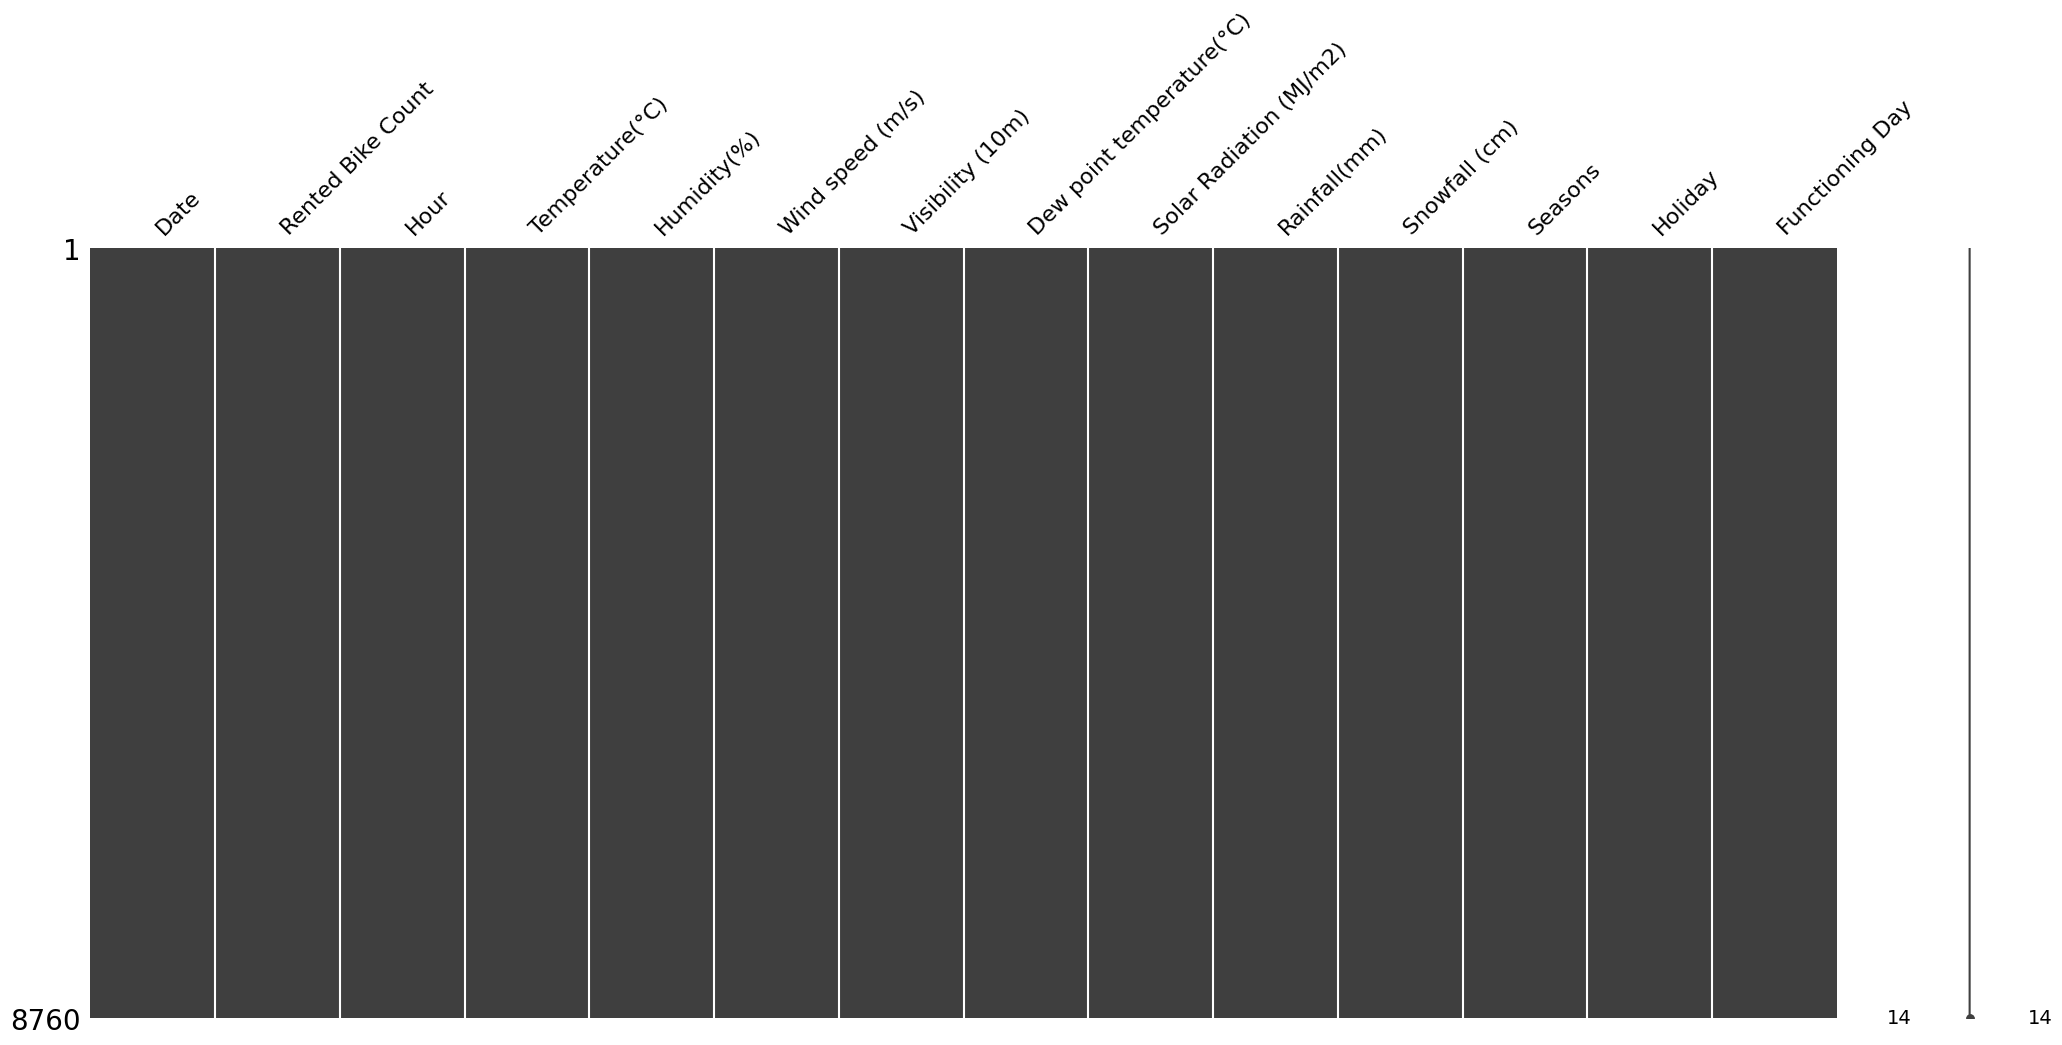

In [8]:
# Visualizing the missing values
msno.matrix(bike_data)

### What did you know about your dataset?

Columns Information:

**Date** has information about date in format year-month-day

**Rented Bike count** has information about Count of bikes rented at each hour

**Hour** - Hour of the day (0 to 23)

**Temperature**- Temperature in Celsius

**Humidity** - humidity with respect to the given hour on the given date (in %)

**Windspeed** - Windspeed with respect to the given hour on the given date (in m/s)

**Visibility** - Visibility with respect to the given hour on the given date (upto 10m)

**Dew point temperature** - Dew point temperature with respect to the given hour on the given date (in Celsius)

**Solar radiation** - Solar Radition with respect to the given hour on the given date (in MJ/m2)

**Rainfall** - Rainfall with respect to the given hour on the given date (in mm)

**Snowfall** - Snowfall with respect to the given hour on the given date (in cm)

**Seasons** - various seasons that is "Winter, Spring, Summer, Autumn"

**Holiday** - if it was holiday or not, namely "Holiday" and "No holiday"

**Functional Day** - shows if the hours were functional or not, No for Non Functional Hours and Yes for Functional hours

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
cols = bike_data.columns
cols

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [10]:
# Dataset Describe
bike_data.describe(include='all').T

count unique         top  freq         mean  \
Date                         8760    365  01/12/2017    24          NaN   
Rented Bike Count          8760.0    NaN         NaN   NaN   704.602055   
Hour                       8760.0    NaN         NaN   NaN         11.5   
Temperature(°C)            8760.0    NaN         NaN   NaN    12.882922   
Humidity(%)                8760.0    NaN         NaN   NaN    58.226256   
Wind speed (m/s)           8760.0    NaN         NaN   NaN     1.724909   
Visibility (10m)           8760.0    NaN         NaN   NaN  1436.825799   
Dew point temperature(°C)  8760.0    NaN         NaN   NaN     4.073813   
Solar Radiation (MJ/m2)    8760.0    NaN         NaN   NaN     0.569111   
Rainfall(mm)               8760.0    NaN         NaN   NaN     0.148687   
Snowfall (cm)              8760.0    NaN         NaN   NaN     0.075068   
Seasons                      8760      4      Spring  2208          NaN   
Holiday                      8760      2  No Holiday  8328          NaN   
Functioning Day              8760      2         Yes  8465          NaN   

                                  std   min    25%     50%      75%     max  
Date                              NaN   NaN    NaN     NaN      NaN     NaN  
Rented Bike Count          644.997468   0.0  191.0   504.5  1065.25  3556.0  
Hour                         6.922582   0.0   5.75    11.5    17.25    23.0  
Temperature(°C)             11.944825 -17.8    3.5    13.7     22.5    39.4  
Humidity(%)                 20.362413   0.0   42.0    57.0     74.0    98.0  
Wind speed (m/s)               1.0363   0.0    0.9     1.5      2.3     7.4  
Visibility (10m)           608.298712  27.0  940.0  1698.0   2000.0  2000.0  
Dew point temperature(°C)   13.060369 -30.6   -4.7     5.1     14.8    27.2  
Solar Radiation (MJ/m2)      0.868746   0.0    0.0    0.01     0.93    3.52  
Rainfall(mm)                 1.128193   0.0    0.0     0.0      0.0    35.0  
Snowfall (cm)                0.436746   0.0    0.0     0.0      0.0     8.8  
Seasons                           NaN   NaN    NaN     NaN      NaN     NaN  
Holiday                           NaN   NaN    NaN     NaN      NaN     NaN  
Functioning Day                   NaN   NaN    NaN     NaN      NaN     NaN

### Variables Description

Answer Here

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
unique_val = []
for val in bike_data.columns:
  x=bike_data[val].nunique()
  unique_val.append(x)

df1 = pd.DataFrame(unique_val, index = bike_data.columns, columns =['Value count'])
df1

Value count
Date                               365
Rented Bike Count                 2166
Hour                                24
Temperature(°C)                    546
Humidity(%)                         90
Wind speed (m/s)                    65
Visibility (10m)                  1789
Dew point temperature(°C)          556
Solar Radiation (MJ/m2)            345
Rainfall(mm)                        61
Snowfall (cm)                       51
Seasons                              4
Holiday                              2
Functioning Day                      2

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.

#converting to proper date time format
bike_data['Date'] = pd.to_datetime(bike_data['Date'])

# creating new colums with respect to their features for future use
bike_data['Year'] = bike_data['Date'].dt.year
bike_data['Month'] = bike_data['Date'].dt.month
bike_data['Day'] = bike_data['Date'].dt.day_name()
# bike_data['Week Number'] = bike_data['Date'].dt.week


#now that we have all the required date information stored in separate columns
#will drop the Date column
bike_data.drop(columns=['Date'],axis=1,inplace=True)

In [13]:
bike_data.head(3)

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  Year  \
0           0.0            0.0  Winter  No Holiday             Yes  2017   
1           0.0            0.0  Winter  No Holiday             Yes  2017   
2           0.0            0.0  Winter  No Holiday             Yes  2017   

   Month       Day  
0      1  Thursday  
1      1  Thursday  
2      1  Thursday

In [14]:
#Renaming the columns for better readability
bike_data.rename(columns={'Temperature(°C)':'Temperature',
                       'Humidity(%)':'Humidity',
                       'Wind speed (m/s)':'Wind Speed',
                       'Visibility (10m)':'Visibility',
                       'Dew point temperature(°C)':'Dew Point Temperature',
                       'Solar Radiation (MJ/m2)':'Solar Radiation',
                       'Rainfall(mm)':'Rainfall',
                        'Snowfall (cm)':'Snowfall'
                       }, inplace = True)

In [15]:
bike_data.head(1)

Rented Bike Count  Hour  Temperature  Humidity  Wind Speed  Visibility  \
0                254     0         -5.2        37         2.2        2000   

   Dew Point Temperature  Solar Radiation  Rainfall  Snowfall Seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   

      Holiday Functioning Day  Year  Month       Day  
0  No Holiday             Yes  2017      1  Thursday

### What all manipulations have you done and insights you found?

OBSERVATIONS:
- No missing values
- Extracted Day,Month,Week and Year from the Date column
- Renamed all the columns

In [16]:
# Separating the data into catrgorical and numerical data
numerical_cols = list(set(bike_data.describe().columns.tolist())- {'Hour','Month'})
categorical_cols = list(set(bike_data.columns)-set(numerical_cols))

In [17]:
categorical_cols

['Day', 'Functioning Day', 'Holiday', 'Hour', 'Seasons', 'Month']

In [18]:
numerical_cols

['Rented Bike Count',
 'Humidity',
 'Year',
 'Temperature',
 'Dew Point Temperature',
 'Visibility',
 'Rainfall',
 'Wind Speed',
 'Snowfall',
 'Solar Radiation']

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
- Plotting chart for the dependent variable (Rented Bike Count)

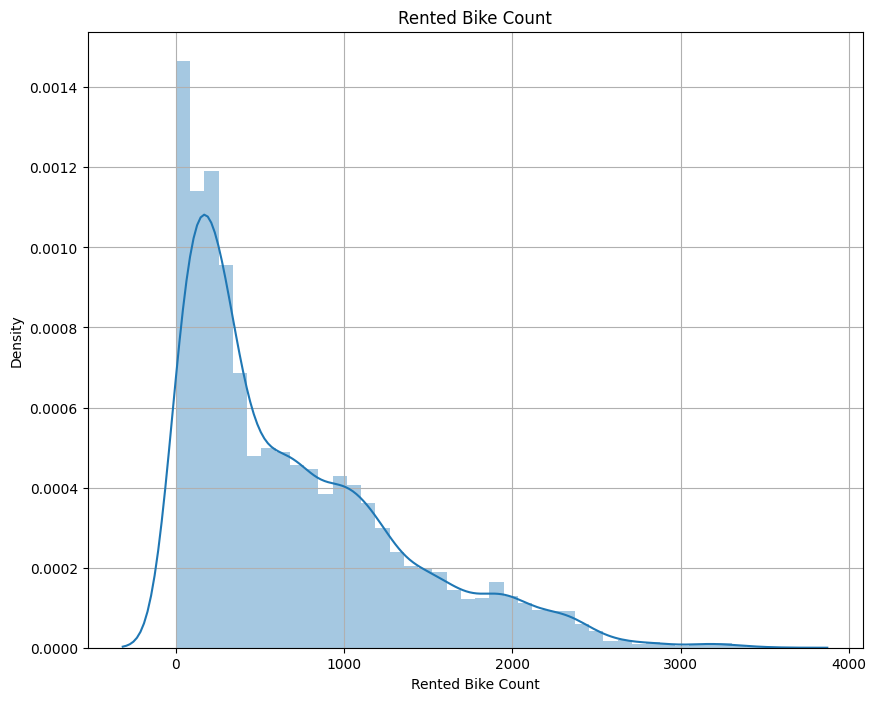

In [19]:
# Chart - 1 visualization code
plt.figure(figsize=(10,8))
sns.distplot(bike_data['Rented Bike Count'])
plt.title('Rented Bike Count')
plt.grid(True)
plt.show()

# px.histogram(bike_data,x='Rented Bike Count',nbins=50, text_auto=True)

##### 1. Why did you pick the specific chart?

- Displot is a good to choice to plot the data distribution

##### 2. What is/are the insight(s) found from the chart?

- The data is positively skewed

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Here we can see that the data is positively skewed so it means the bike demand for smaller bulks is more

#### Chart - 2
- Data distribution of categorical data wrt to Rented Bike Count

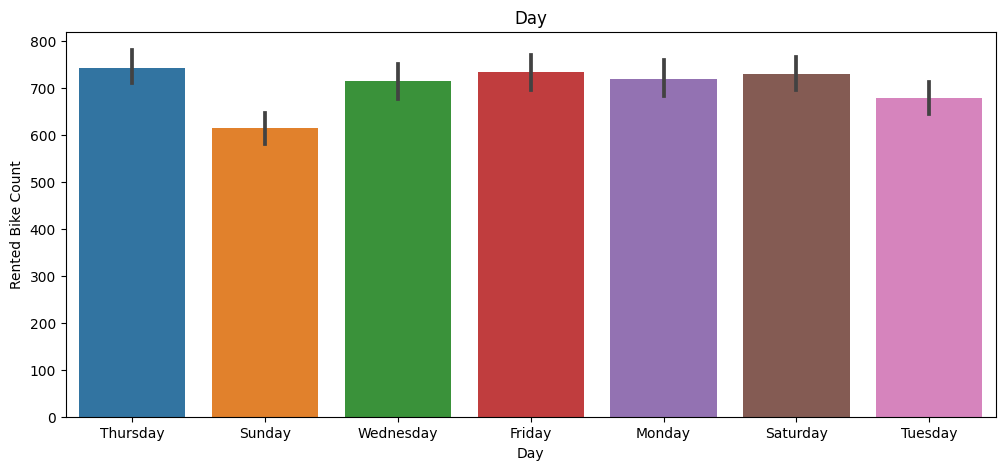

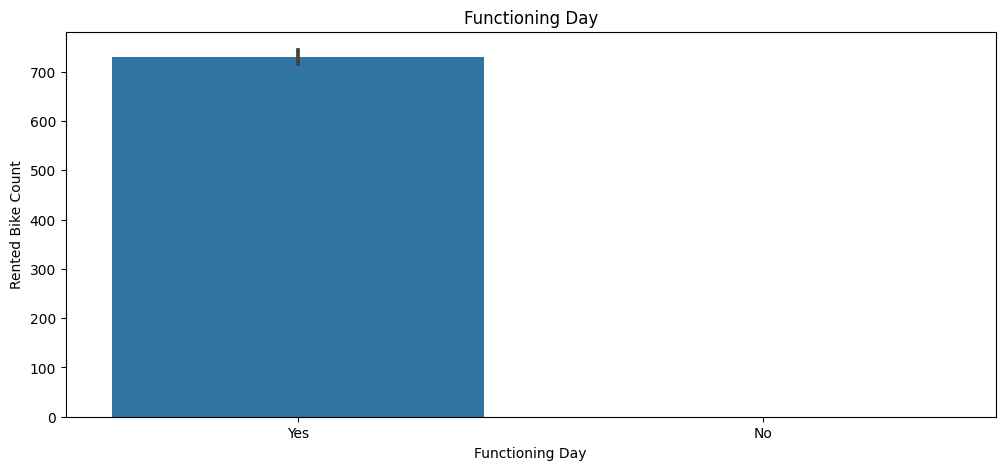

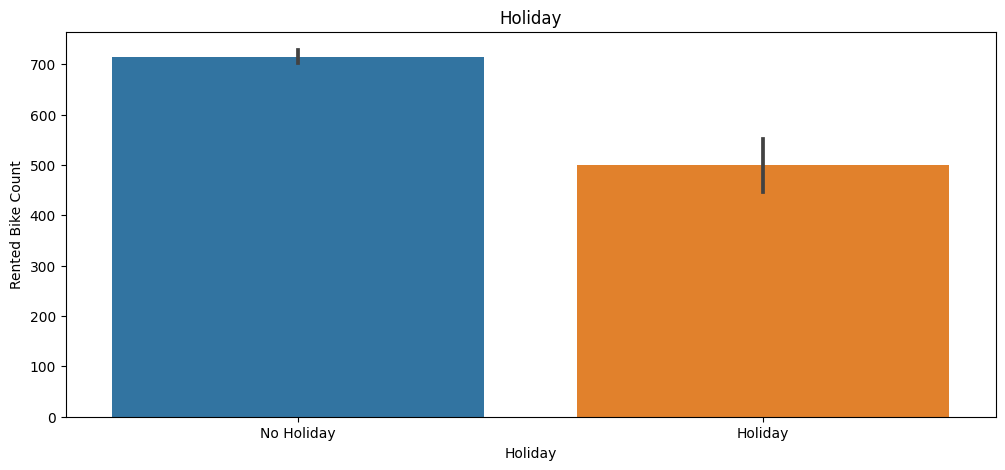

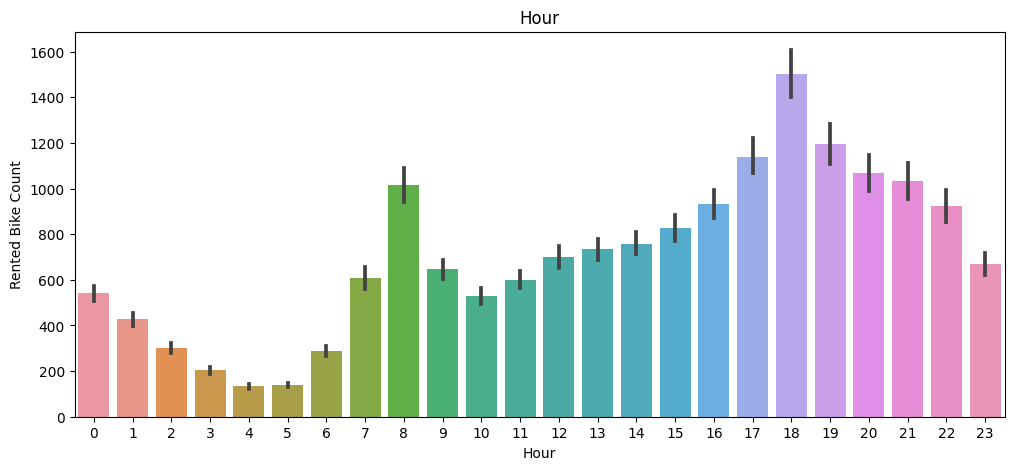

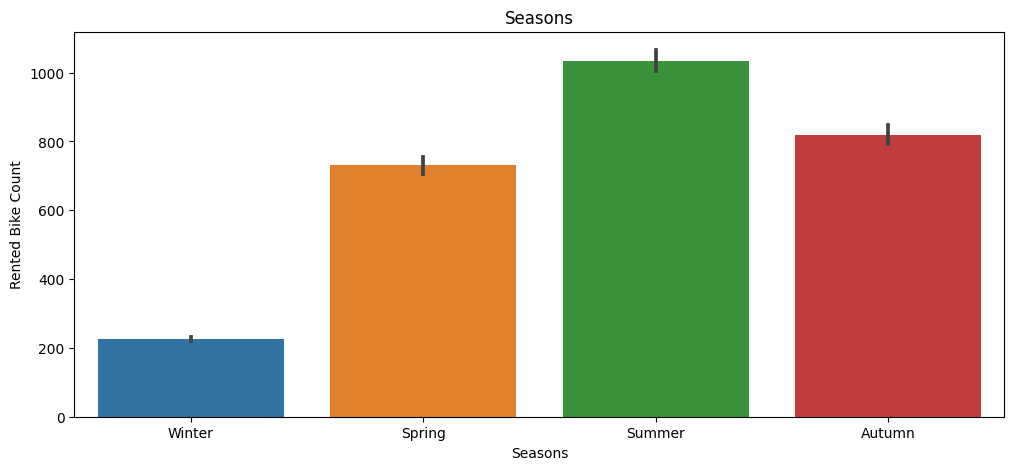

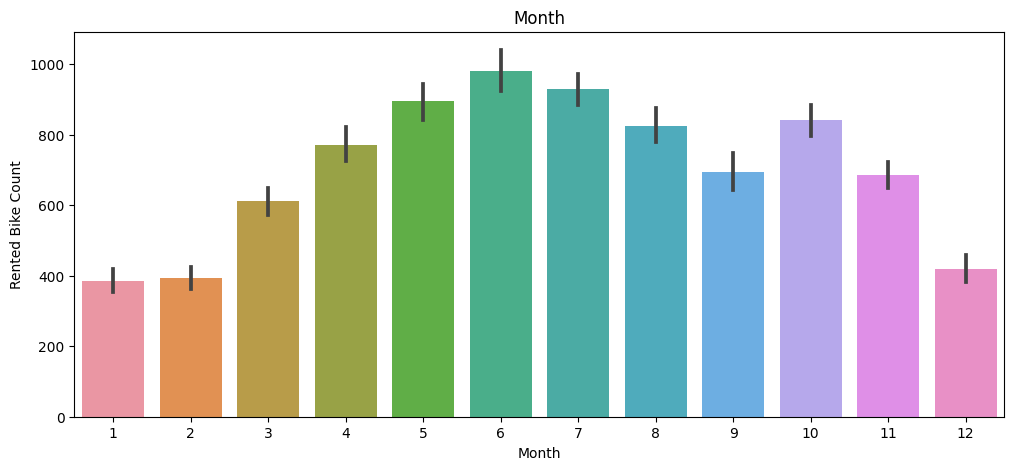

In [20]:
# Chart - 2 visualization code
for col_name in categorical_cols:
  plt.figure(figsize=(12,5))
  sns.barplot(x=bike_data[col_name],y=bike_data['Rented Bike Count'])
  plt.title(col_name)
  plt.show()

# for col_name in categorical_cols:
#     fig = px.bar(bike_data, x=col_name, y=bike_data['Rented Bike Count'], title=col_name,color=col_name, labels={col_name: col_name})
#     fig.show()

##### 1. Why did you pick the specific chart?

- To visualize the data spread of the categorical features.

##### 2. What is/are the insight(s) found from the chart?

- Peak Hours : 5pm - 8pm
- Peak Months: June(Highest) & January(Lowest)
- Weekdays count : Thursday(Highest)
- Preferred season : Summer(Most) & Winter(Least)


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- The above insights can definitely have to create a positive business impact as we got many information.

#### Chart - 3
- Chart of Bike Rent Count throughout the year

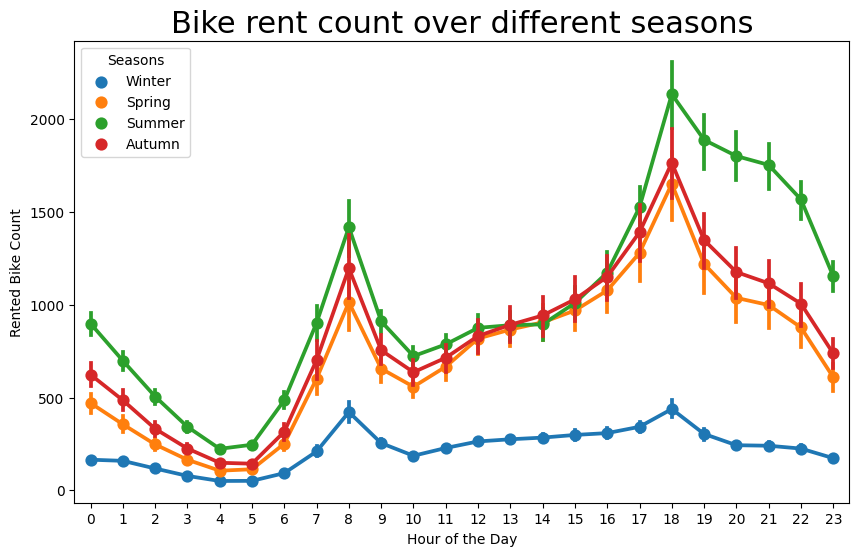

In [21]:
plt.figure(figsize=(10,6))
sns.pointplot(x=bike_data['Hour'],y=bike_data['Rented Bike Count'],hue=bike_data['Seasons'])
plt.title('Bike rent count over different seasons',fontsize=22)
plt.xlabel('Hour of the Day')
plt.show()

##### 1. Why did you pick the specific chart?

- Point plot is a good choice for plotting time series data.

##### 2. What is/are the insight(s) found from the chart?

- Out of the four seasons Summer has the highest bike rent count and Winter has the least.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Bike rental companies can maximize their profits during the Summer and Autumn.

#### Chart - 4
- Checking for Outliers in the numerical column

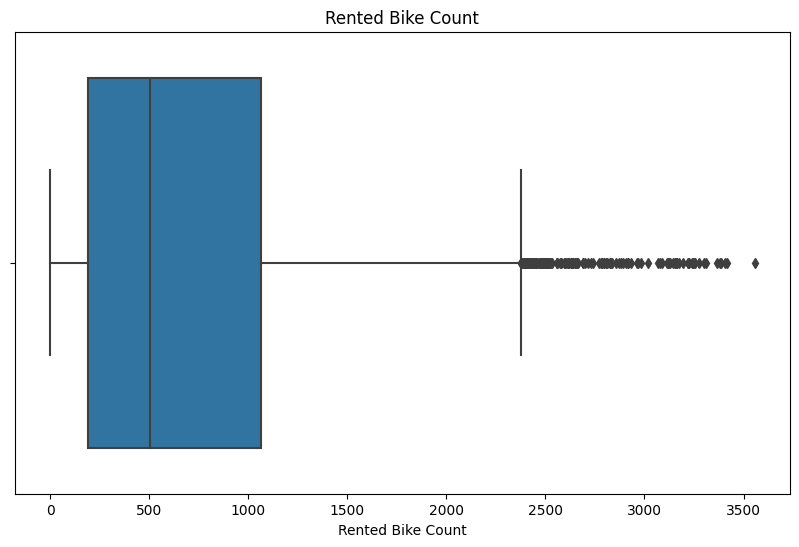

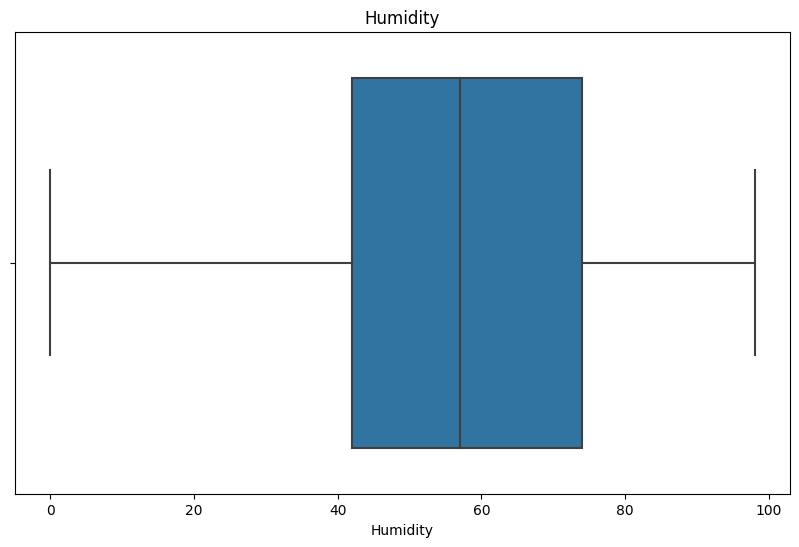

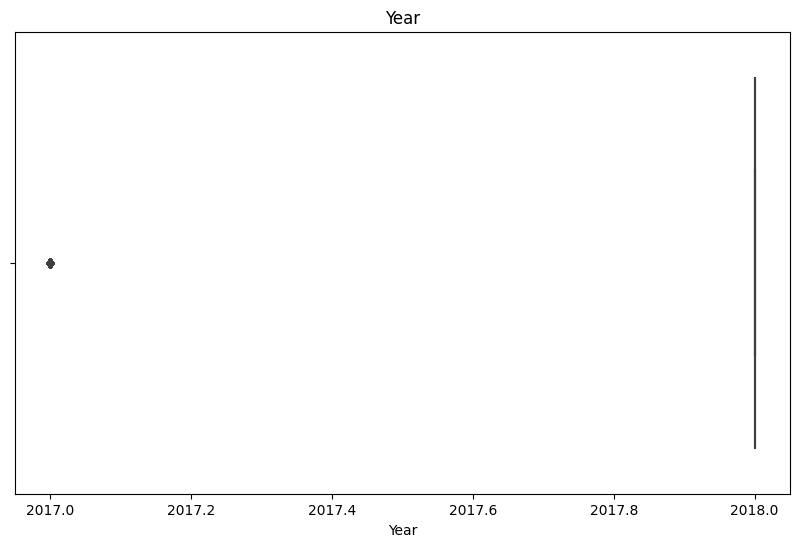

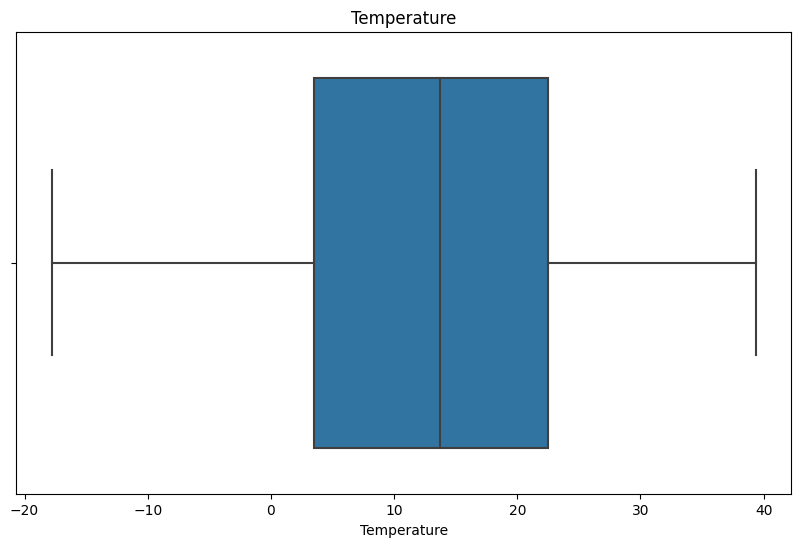

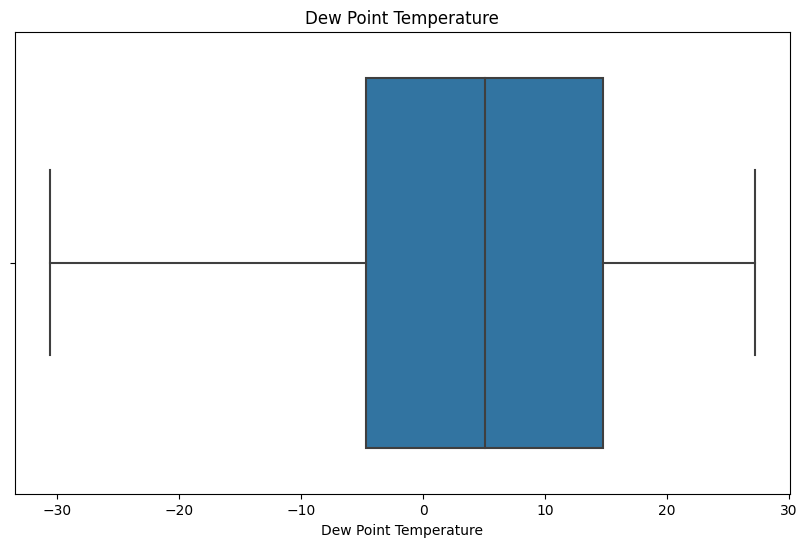

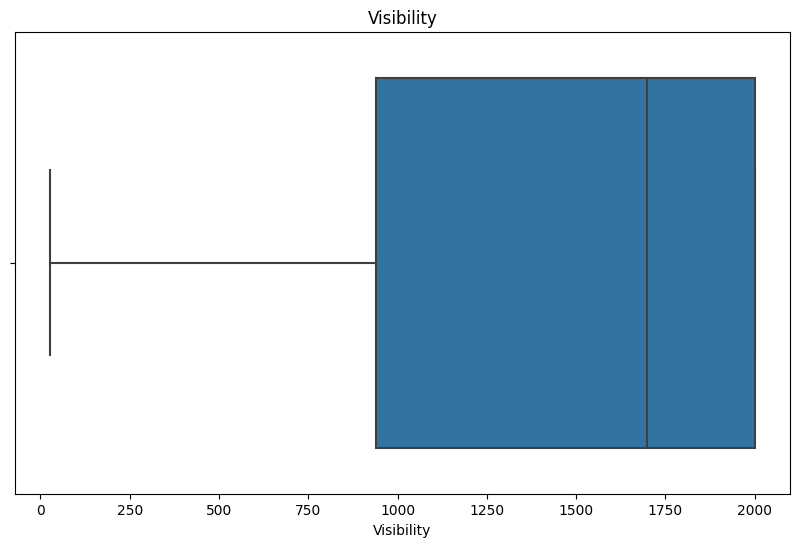

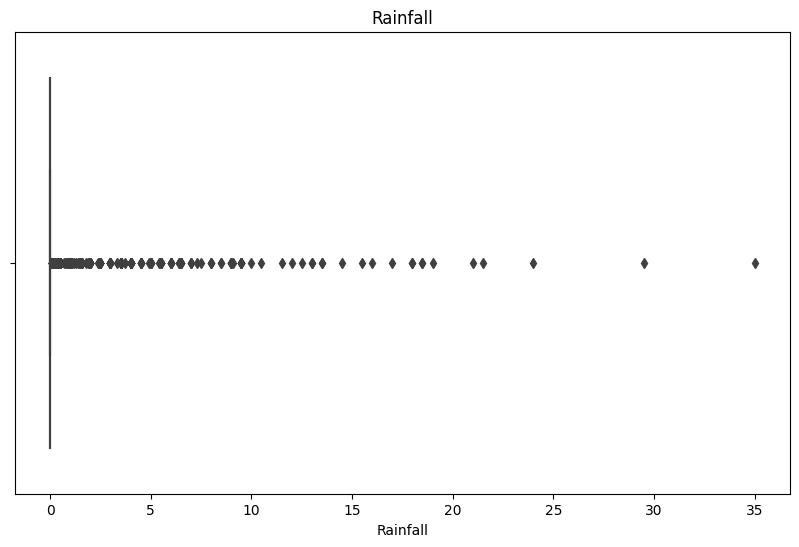

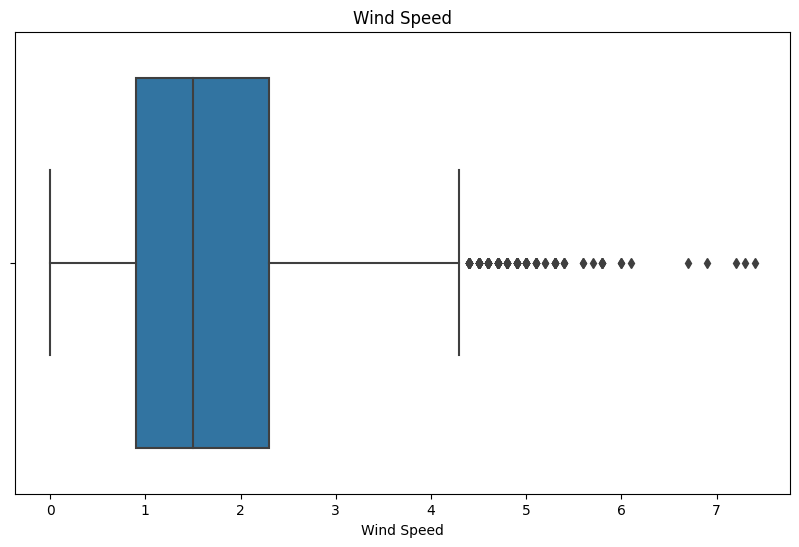

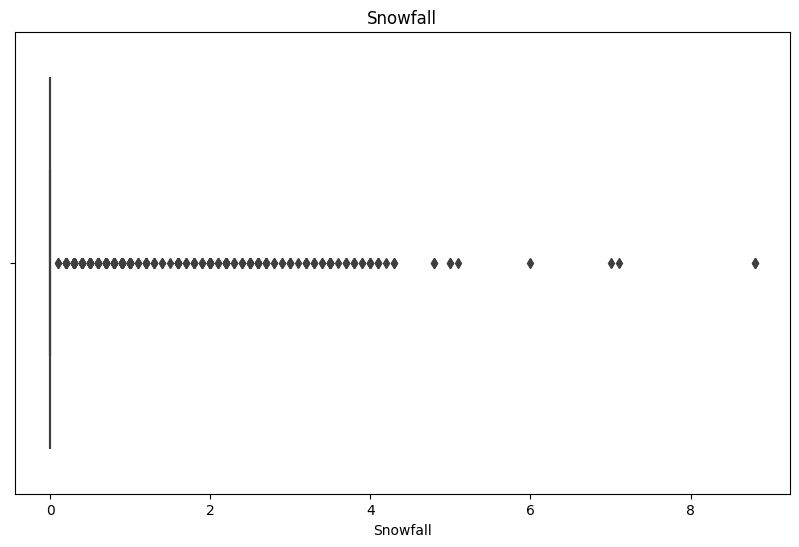

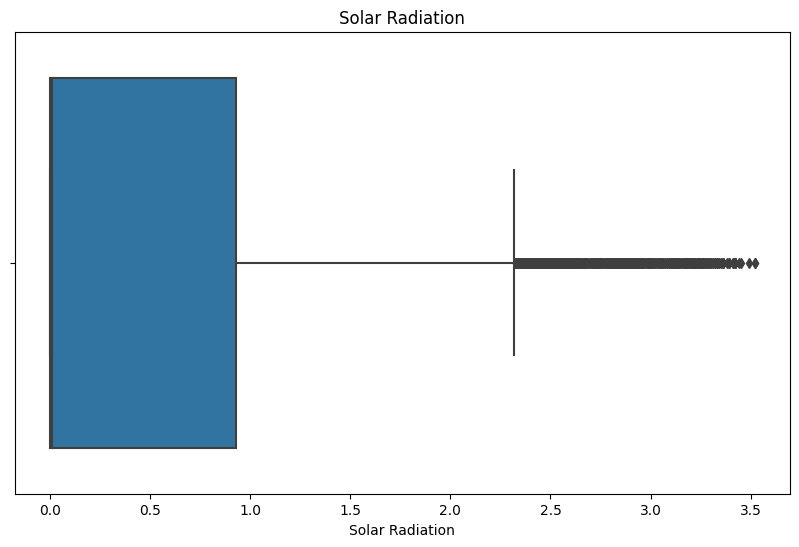

In [22]:
# Chart - 4 visualization code
for val in numerical_cols:
  plt.figure(figsize=(10,6))
  sns.boxplot(x=bike_data[val])
  plt.title(val)
  plt.show()

##### 1. Why did you pick the specific chart?

- Boxplots can be used to visualize outliers present in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Columns with outliers:
- Rainfall
- Solar Radiation
- Snowfall
- Windspeed

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- In some cases presence of outliers can be an opporunity for business growth.

#### Chart - 5
- Bike Rent Count with specific hours of the Day

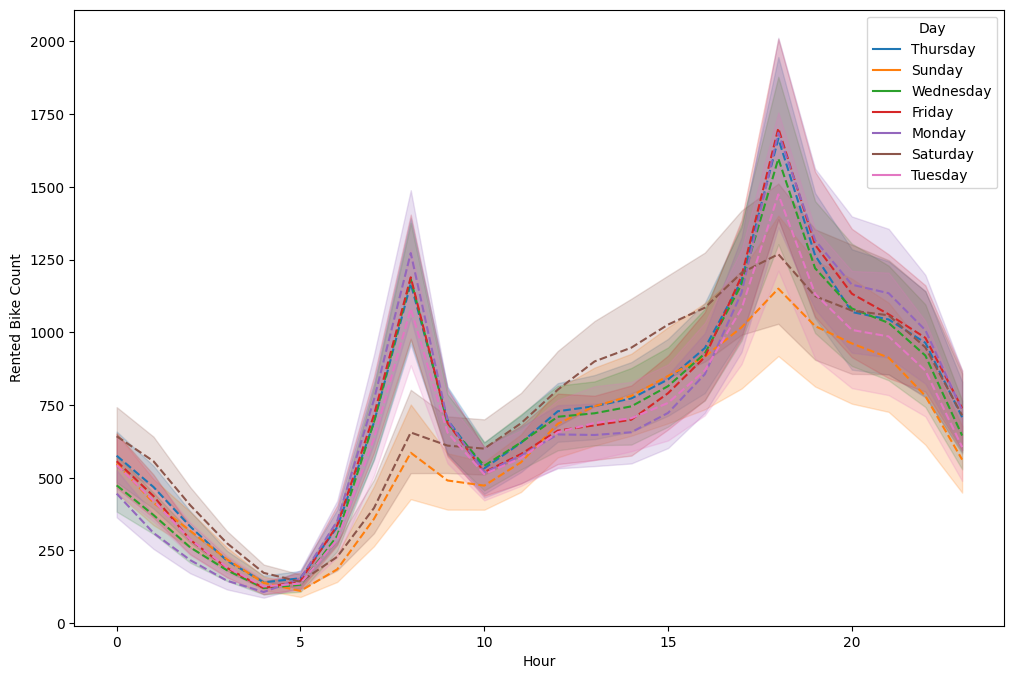

In [23]:
# Chart - 5 visualization code
plt.figure(figsize=(12,8))
sns.lineplot(x=bike_data['Hour'],y= bike_data['Rented Bike Count'],hue=bike_data['Day'],linestyle='dashed')
plt.show()


##### 1. Why did you pick the specific chart?

- To perform a multivariate analysis.

##### 2. What is/are the insight(s) found from the chart?

- Highest number of bikes are rented on Friday and Thursday.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- We can see on which days more bikes are rented so based on the day companies can stock up and maximize the profits.

#### Chart - 6
- Bike Rent Count on Holidays

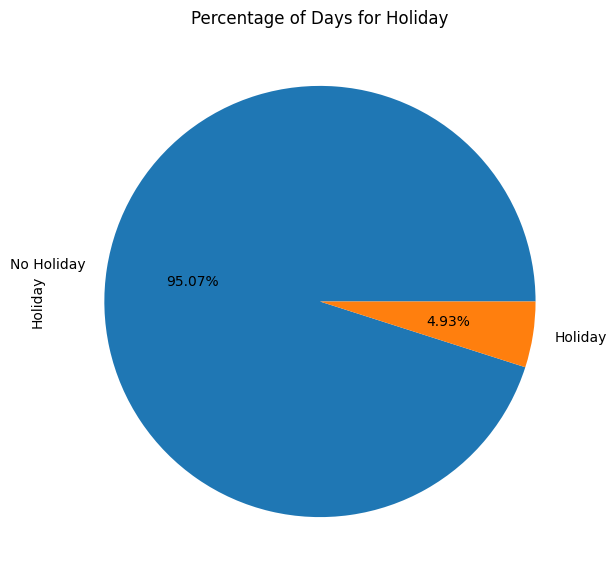

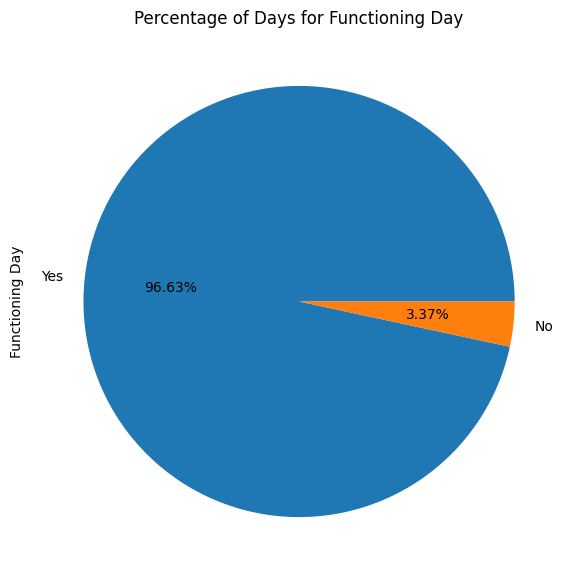

In [24]:
# Chart - 6 visualization code
cols = ['Holiday','Functioning Day']

for col in cols:
  days_percent = bike_data[col].value_counts()
  plt.figure(figsize=(7,7))

  days_percent.plot(kind='pie',autopct="%.2f%%")
  plt.title(f"Percentage of Days for {col}")
  plt.show()

##### 1. Why did you pick the specific chart?

- Pie charts are easy to interpret and understand the logic and share of values better in percentage.

##### 2. What is/are the insight(s) found from the chart?

- Its is observed that 95.07% of days are working(non-holiday) and 4.93% of days are holidays in the data given.

- And 96.63% of values are recorded as functioning day where are the remaining are non functioning day

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Majority of the days when the data was recorded are either Non-Holiday or Functional days.

#### Chart - 7
- Regression plot of the numerical columns

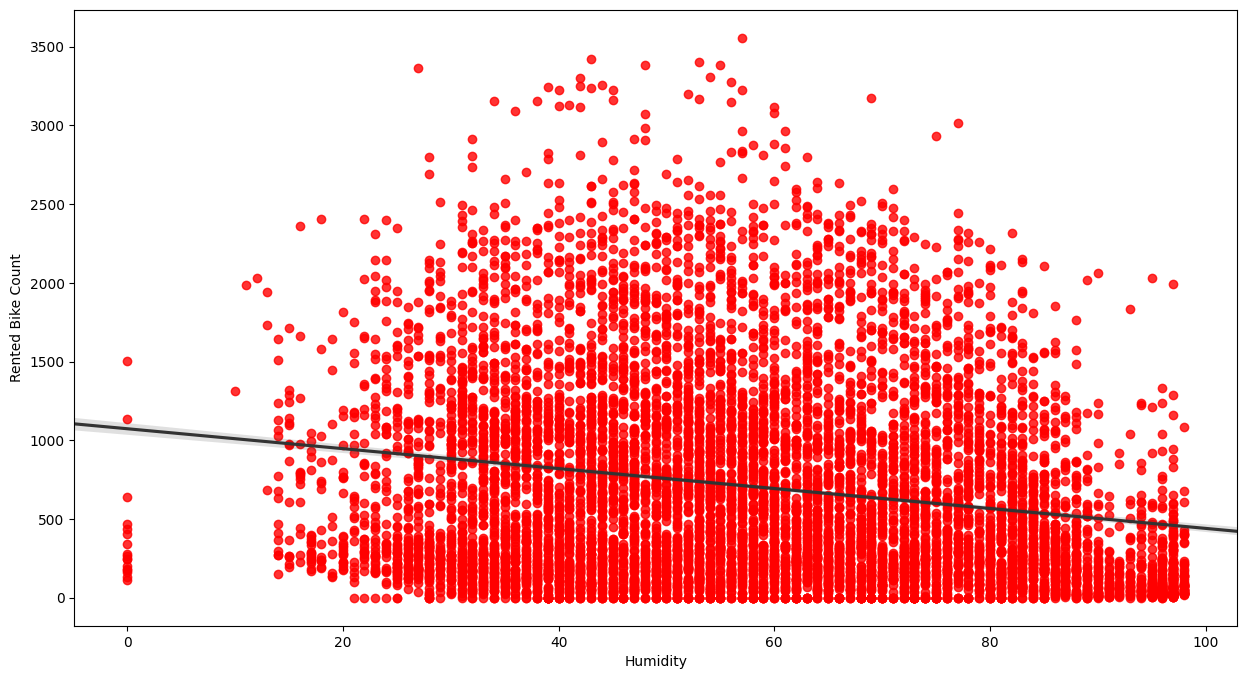

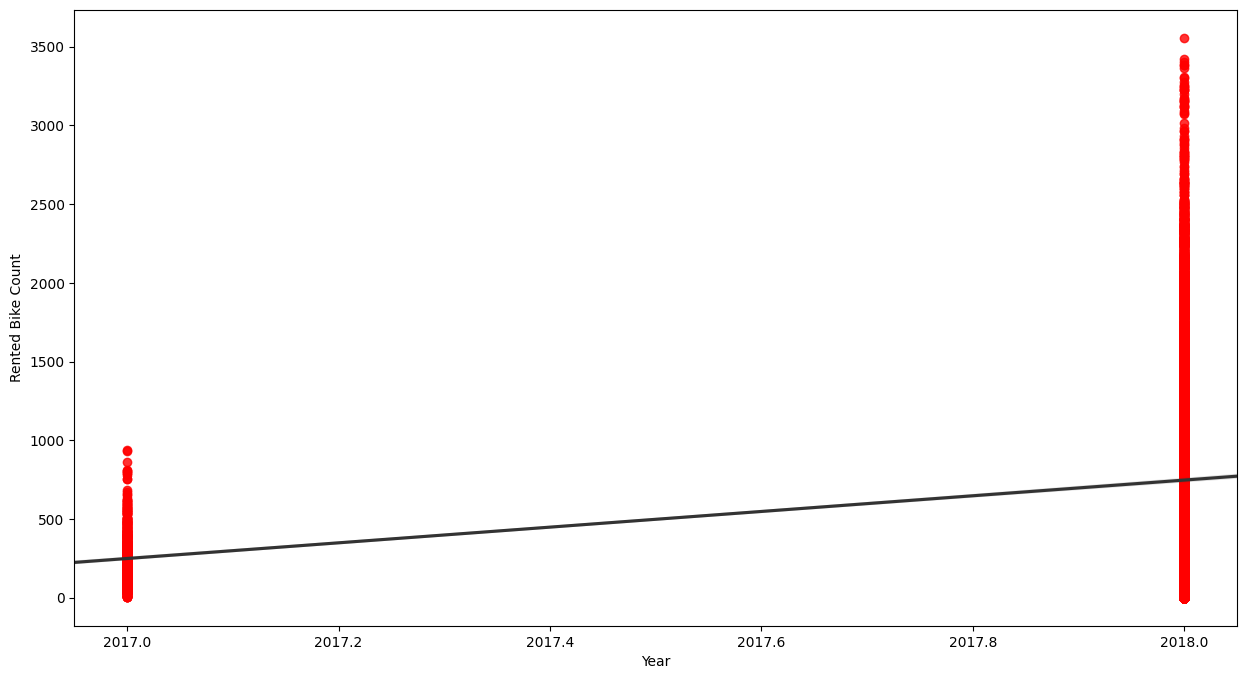

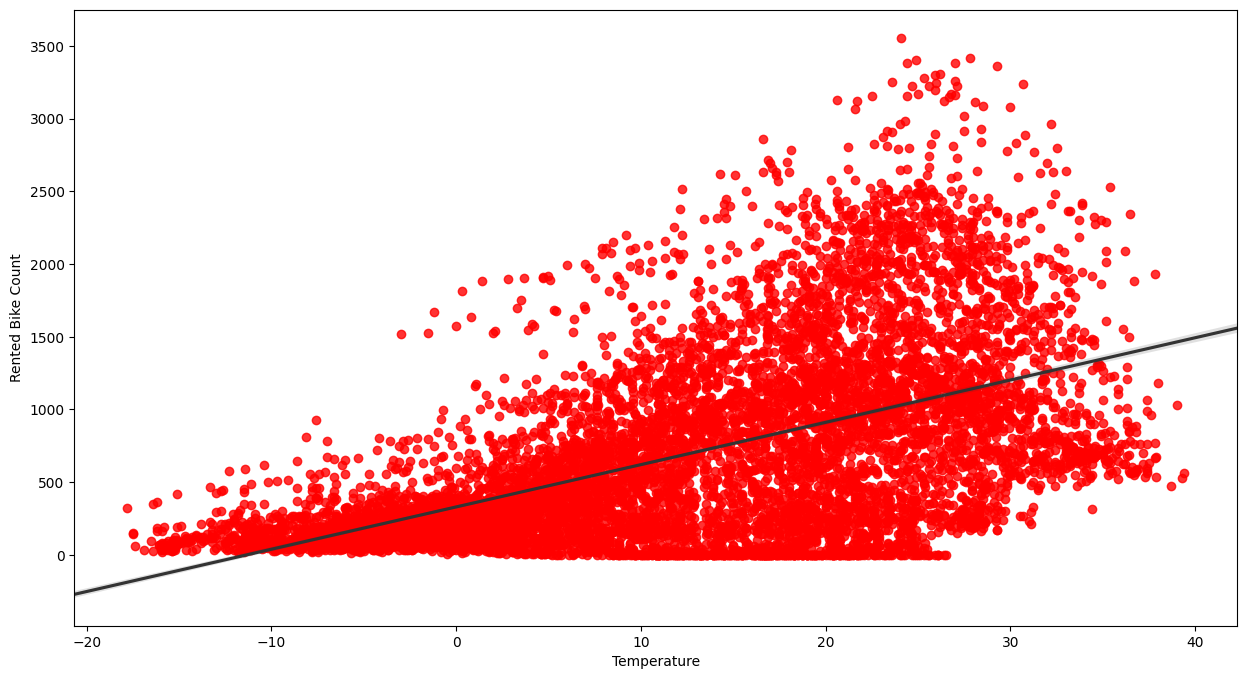

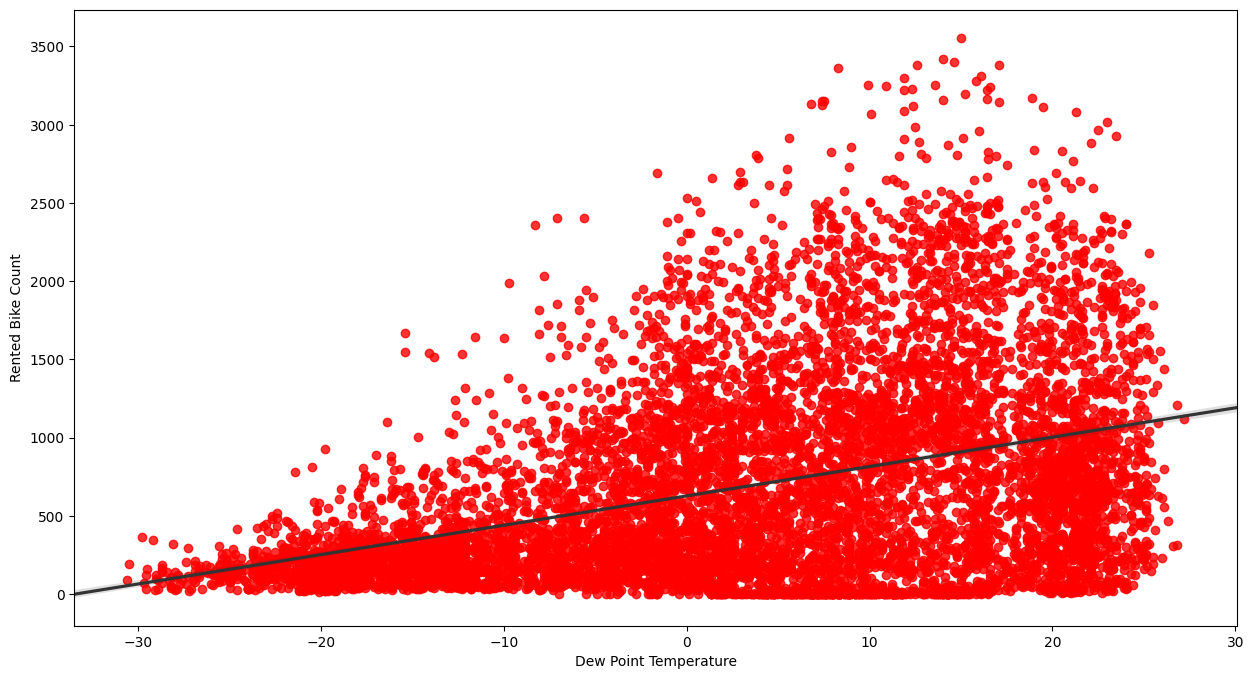

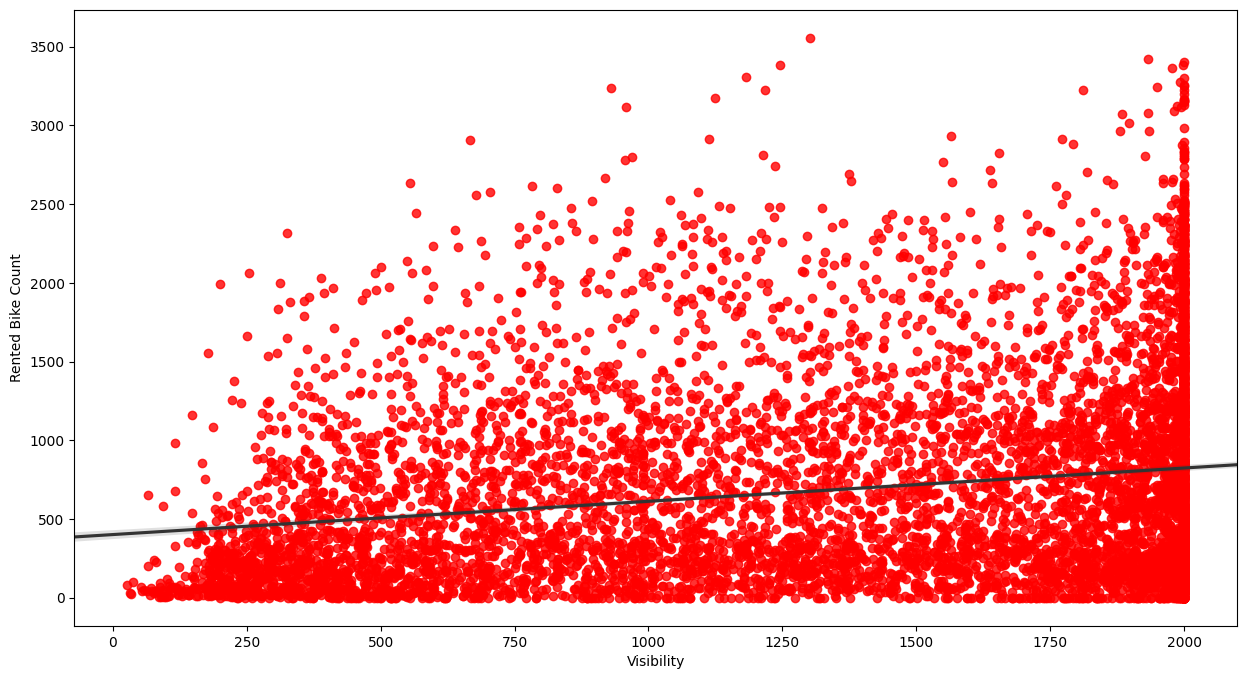

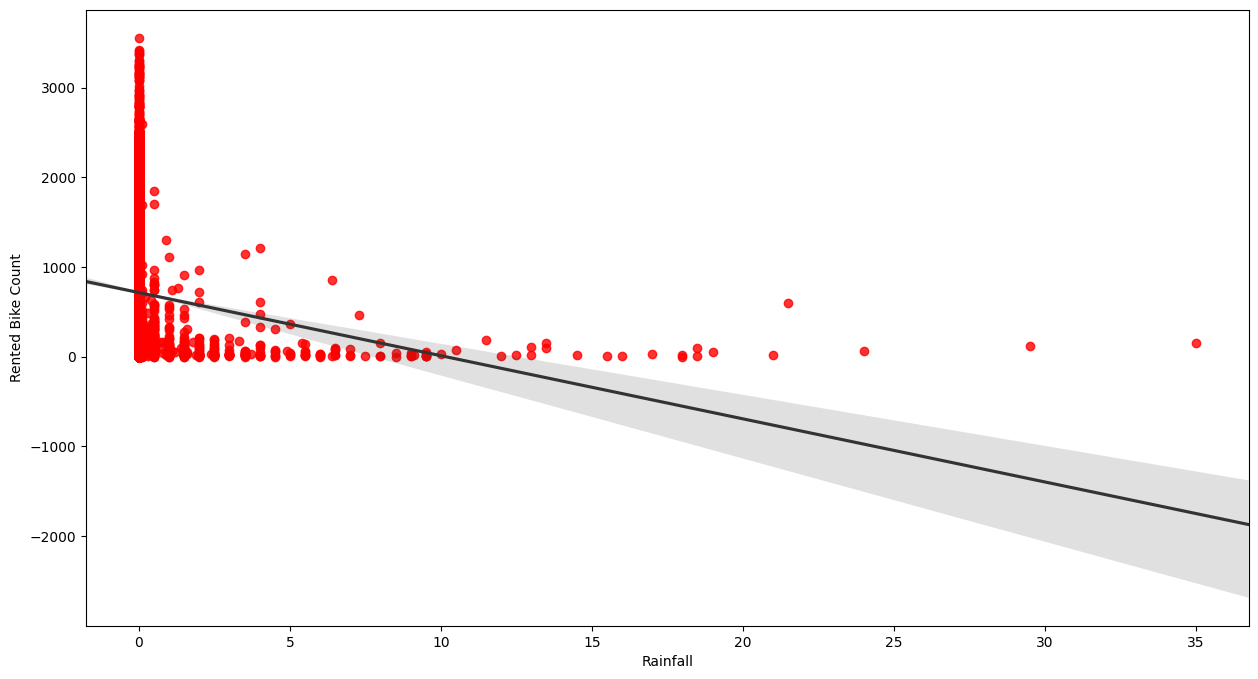

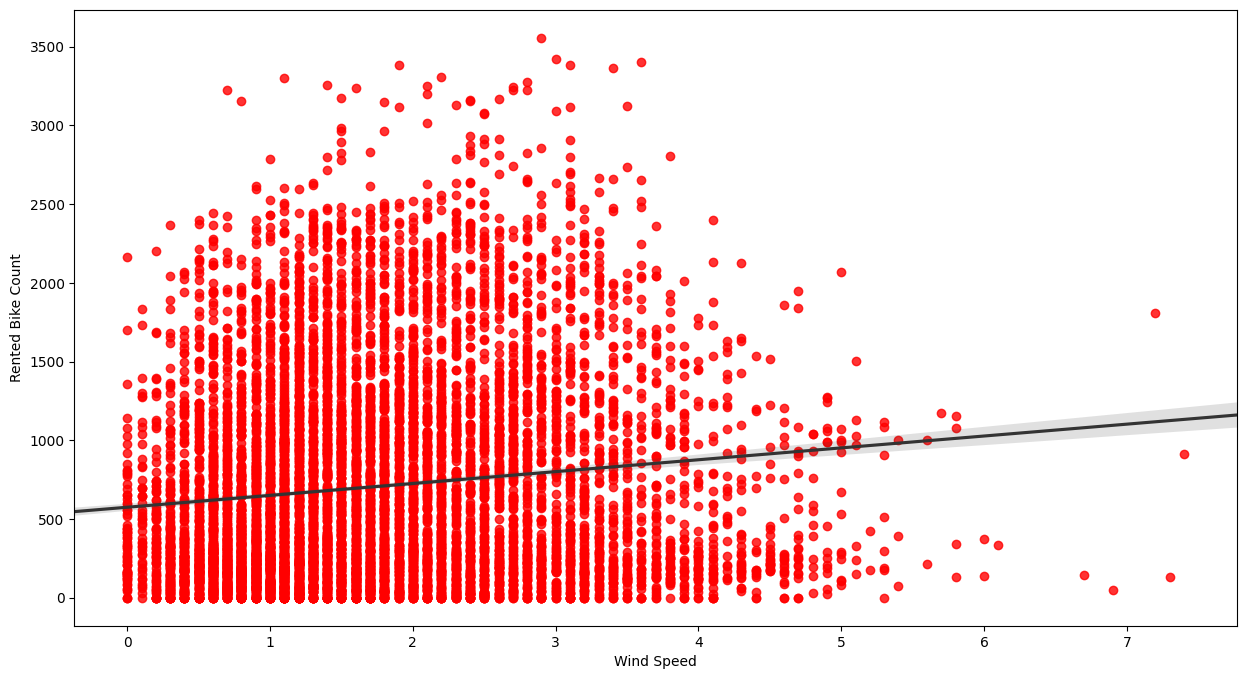

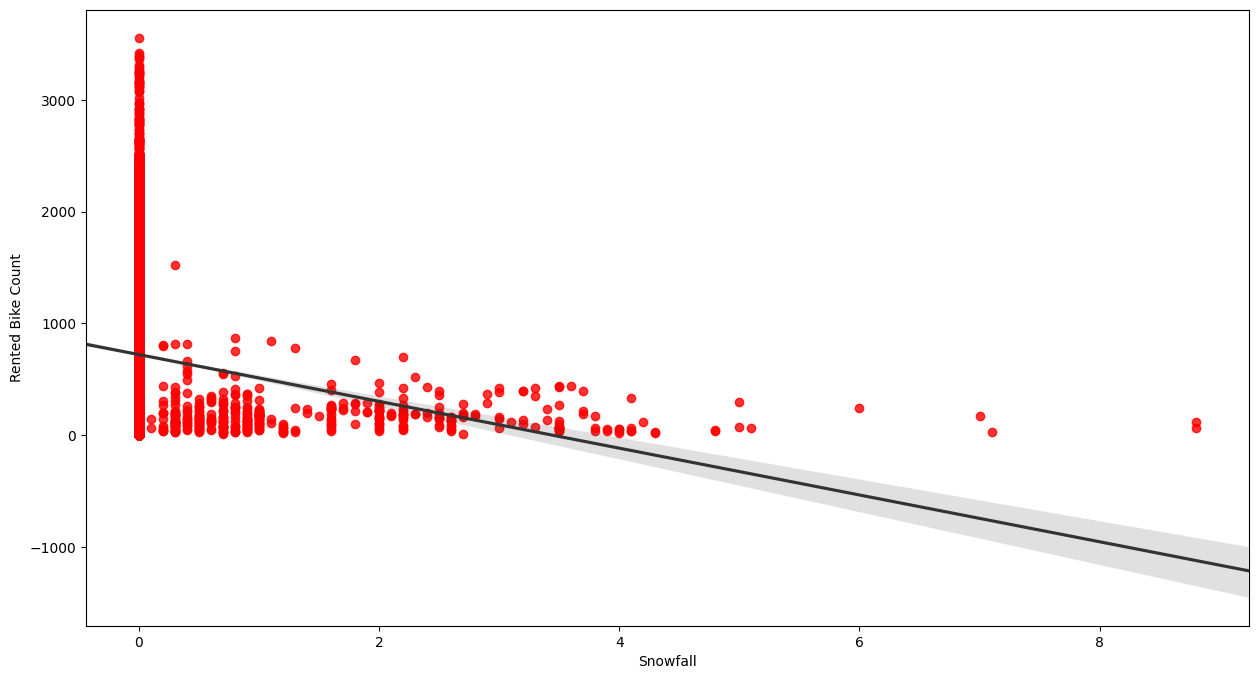

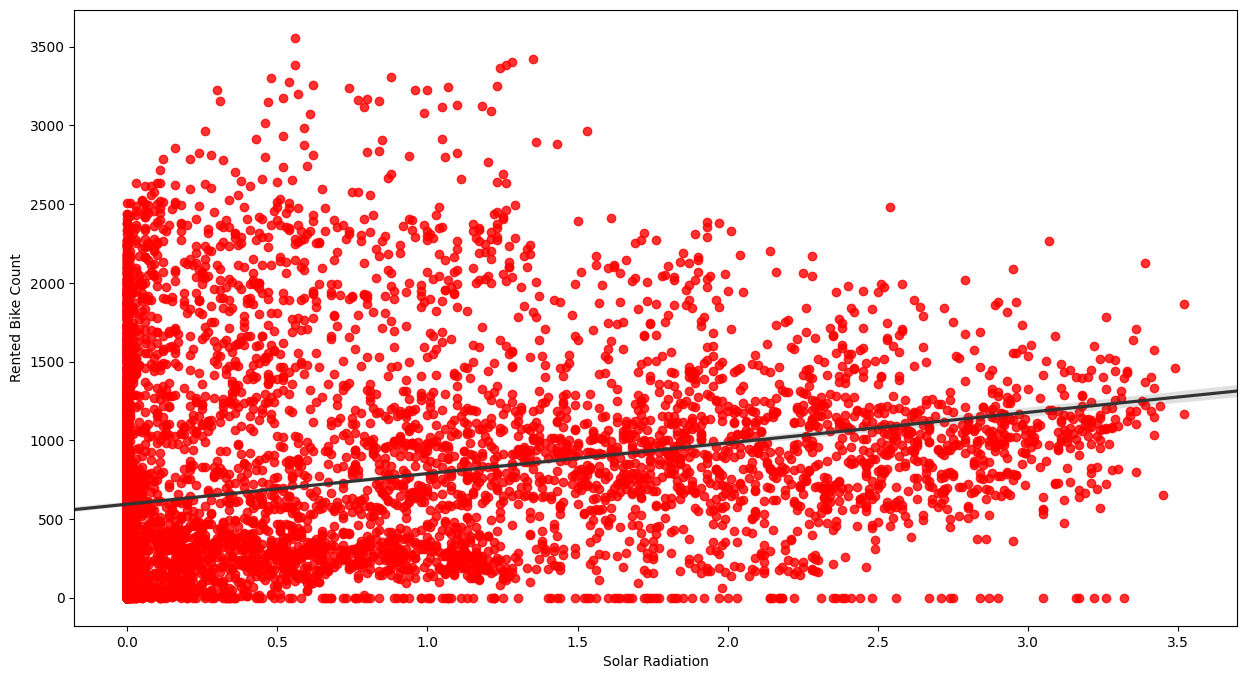

In [25]:
# Chart - 7 visualization code
for val in numerical_cols:
  if val not in ['Rented Bike Count']:
    fig = plt.figure(figsize=(15,8))
    fig = plt.gca()

    sns.regplot(data=bike_data, x=val, y='Rented Bike Count',truncate=False,color='.2',scatter_kws={'color':'red'})
    plt.show()

##### 1. Why did you pick the specific chart?

- A linear regression plot shows the average increase in Y as X increases.

##### 2. What is/are the insight(s) found from the chart?

Weather factor relationship with demand for rental bikes:
- Temperature	: Positive (increases demand)
- Humidity : Negative (decreases demand)
- Wind speed	: Positive (increases demand) up to 3 kilometers per hour
- Visibility	: No clear relationship
- Dew point temperature	: Positive (increases demand)
- Solar radiation	: Positive (increases demand)
- Snowfall and rainfall	: Negative (decreases demand)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- By understanding the average demand for rental bikes under different environmental conditions, businesses can better meet the needs of their customers and maximize profits.

#### Chart - 8
- Bike rent demand on hourly basis

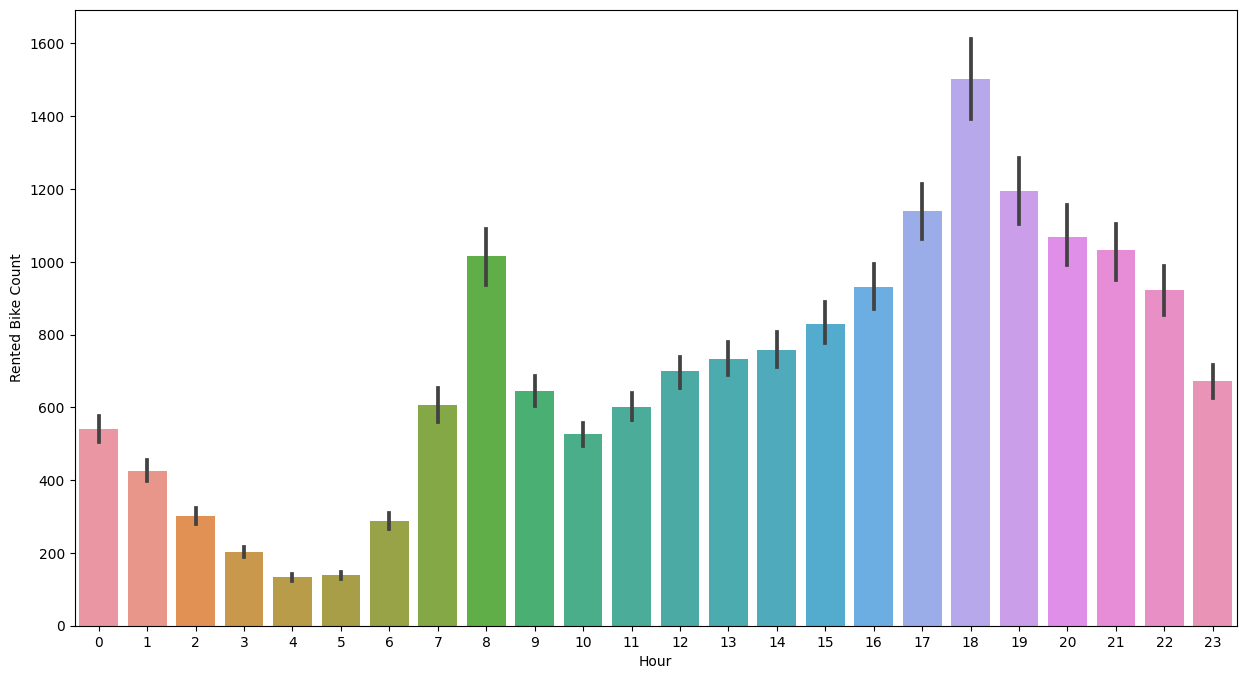

In [26]:
# Chart - 8 visualization code
plt.figure(figsize=(15,8))
Hour=bike_data.groupby('Hour').sum().reset_index()
sns.barplot(x='Hour',y='Rented Bike Count', data=bike_data)
plt.show()

##### 1. Why did you pick the specific chart?

- Bar charts are a helpful way to communicate data to others, as they are easy to understand and interpret.

##### 2. What is/are the insight(s) found from the chart?

- Peak hours are between 5 to 8 pm

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Companies can try to keep the highest numbers of bike available during the peak hours and try to maximize the profit.

#### Chart - 9
- Plotting chart of the dependent variable before applying normalization

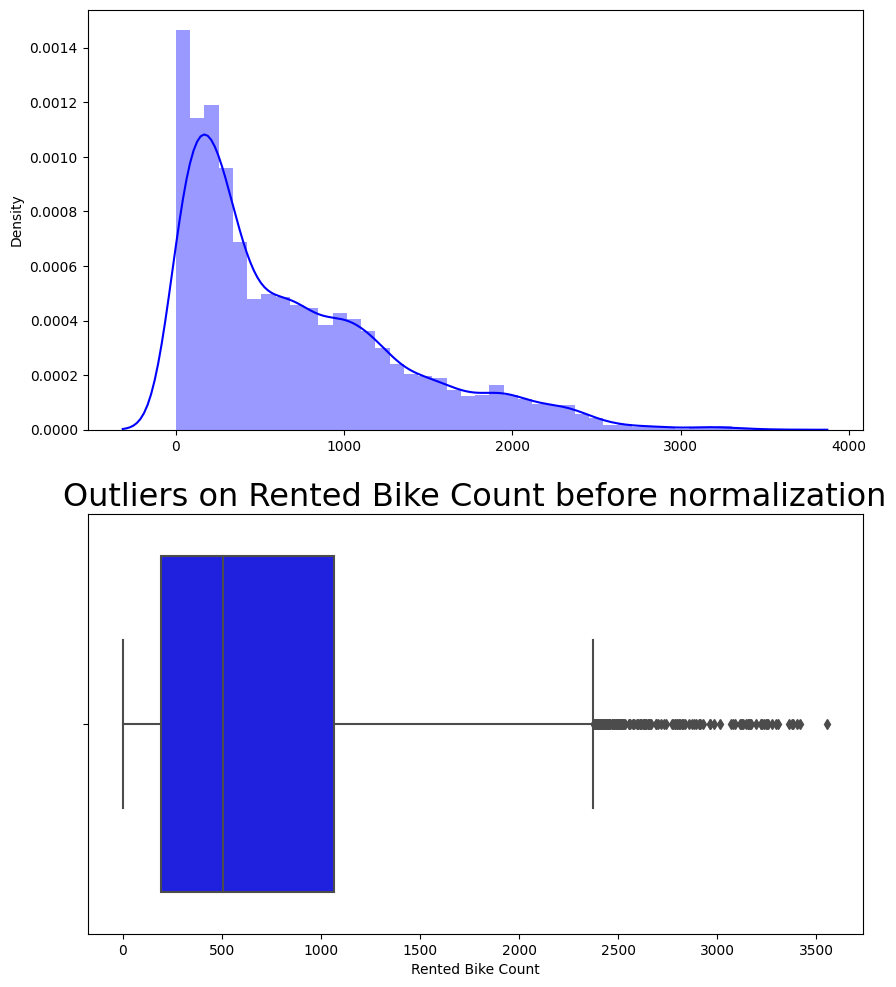

In [27]:
# Chart - 9 visualization code

#Plotting the distplot and boxplot
fig,ax = plt.subplots(2,1,figsize=(10,12))
sns.distplot(x=bike_data['Rented Bike Count'],color='b',ax=ax[0])
sns.boxplot(x=bike_data['Rented Bike Count'],color='b',ax=ax[1])
plt.title("Outliers on Rented Bike Count before normalization",fontsize=23)
plt.show()

##### 1. Why did you pick the specific chart?

- Boxplot can be used to visualize the outliers present in the dataset.

##### 2. What is/are the insight(s) found from the chart?

- Dependent variable column is highly skewed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Without normalization this could affect the model accuracy and performance.

#### Chart - 10
- Plotting chart of the dependent variable after applying normalization

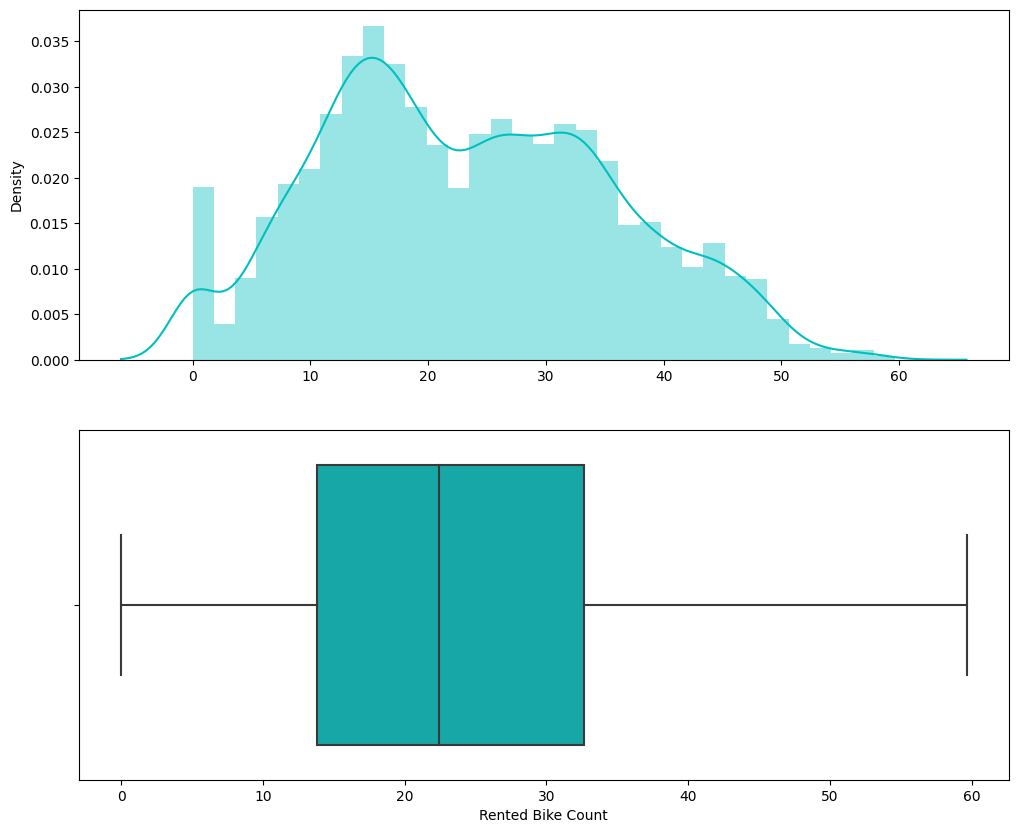

In [28]:
# Chart - 10 visualization code

#Data normalization using the square root method
fig,ax = plt.subplots(2,1,figsize=(12,10))
sns.distplot(x=np.sqrt(bike_data['Rented Bike Count']),color='c',ax=ax[0])
sns.boxplot(x=np.sqrt(bike_data['Rented Bike Count']),color='c',ax=ax[1])
plt.show()

##### 1. Why did you pick the specific chart?

- Distpot hepls in visualizing the data distribution.

##### 2. What is/are the insight(s) found from the chart?

- After normalization, dependent variable isn't skewed as the outliers have been removed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Normalization is a useful technique that can improve the accuracy and performance of machine learning models.

#### Chart - 11
- Plotting charts of the numerical columns

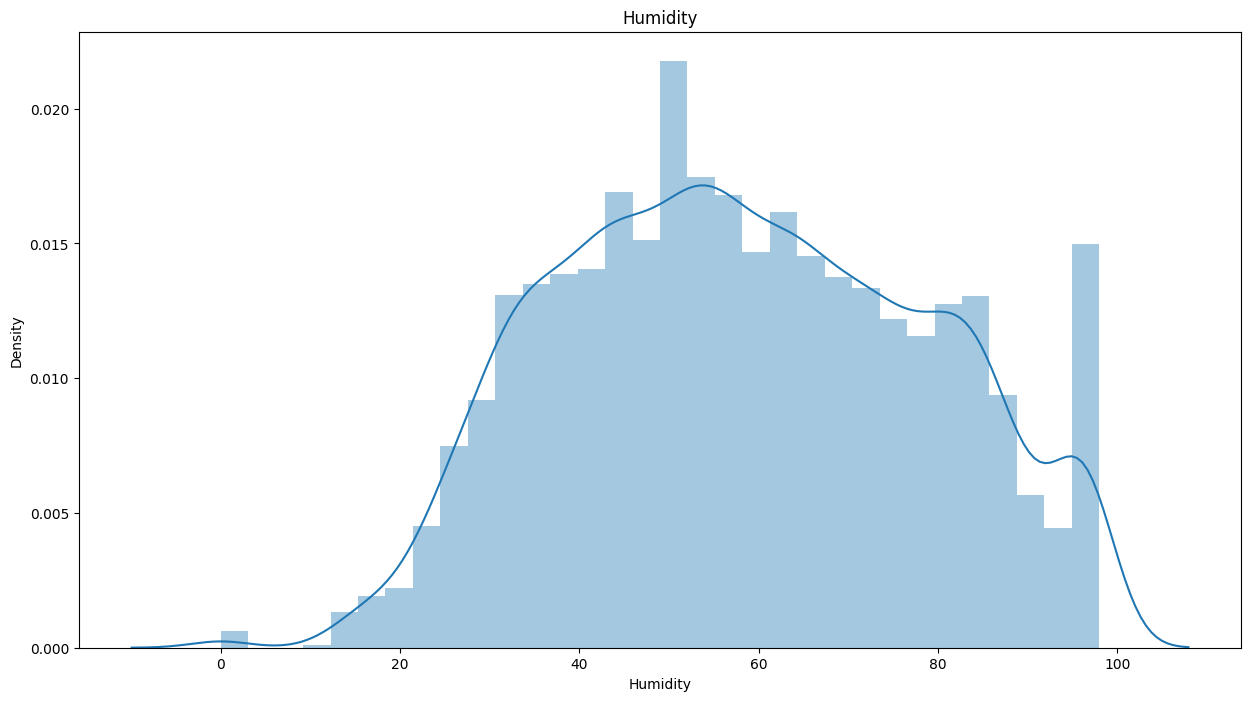

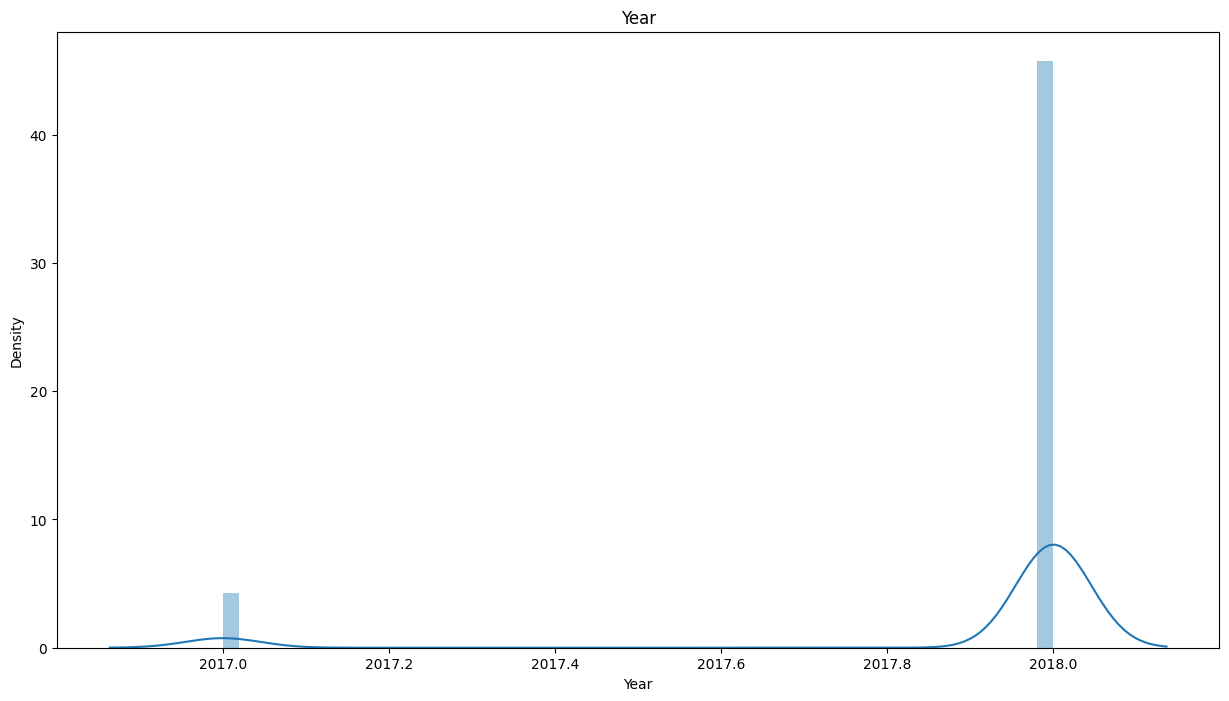

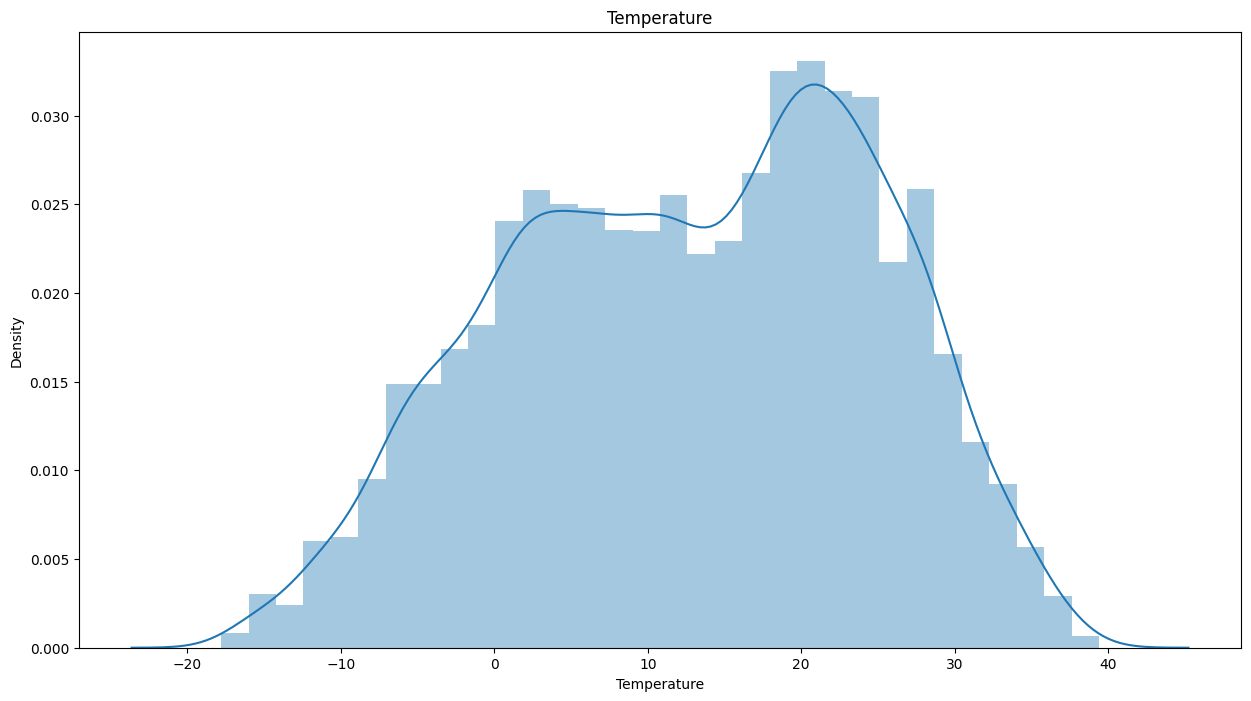

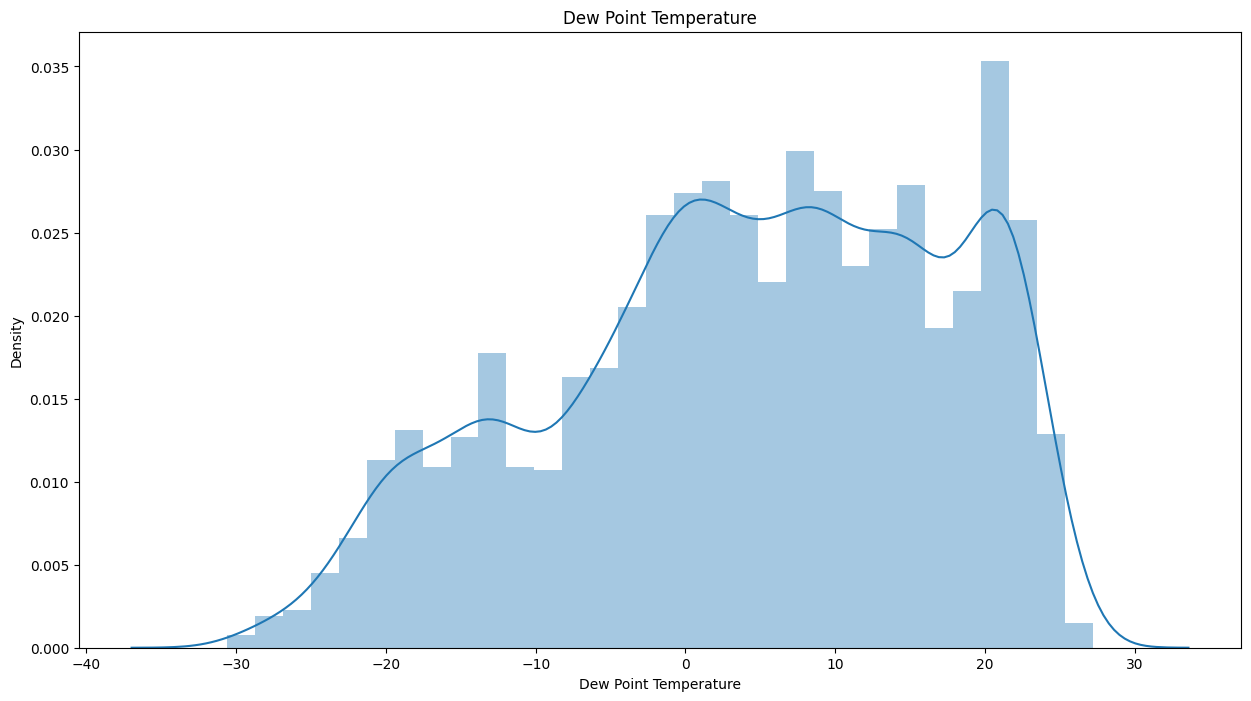

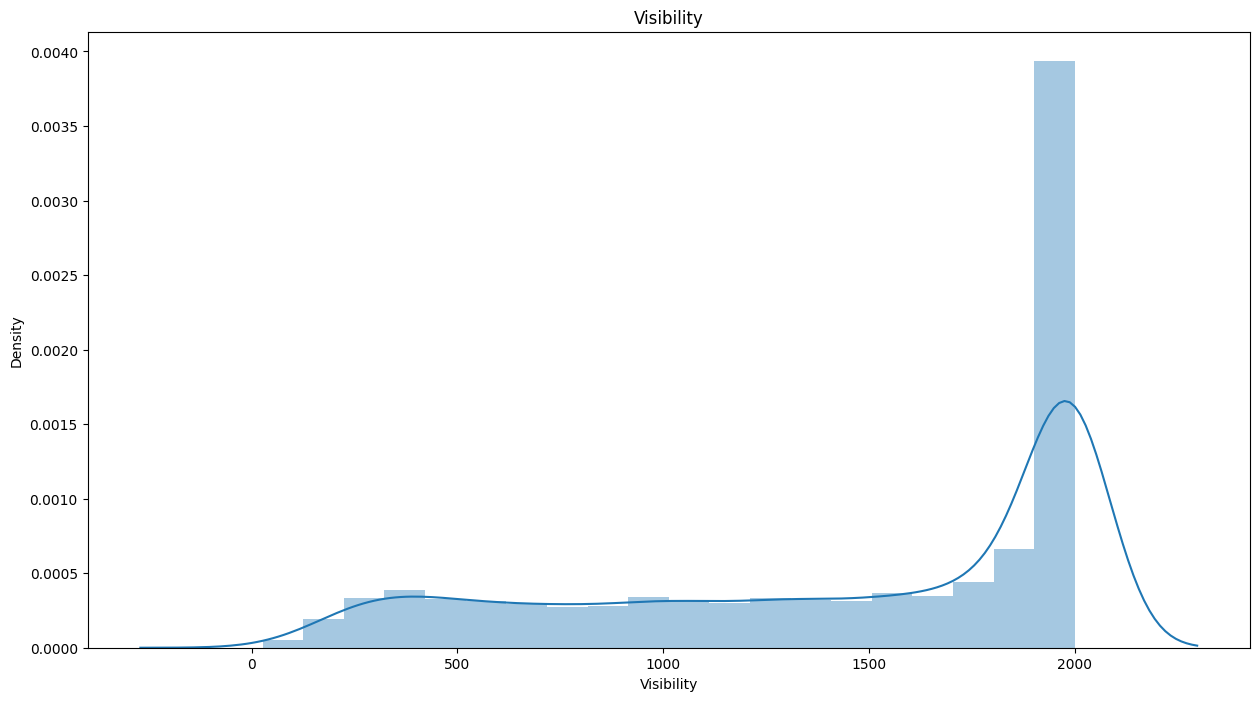

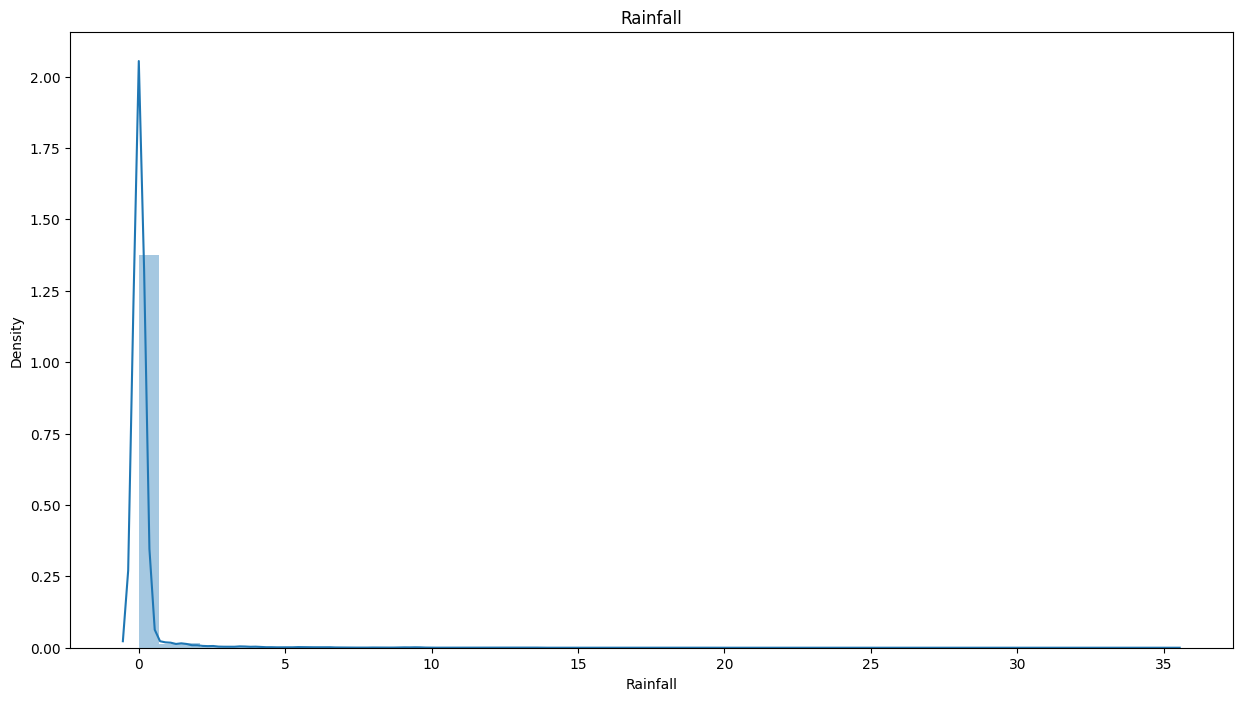

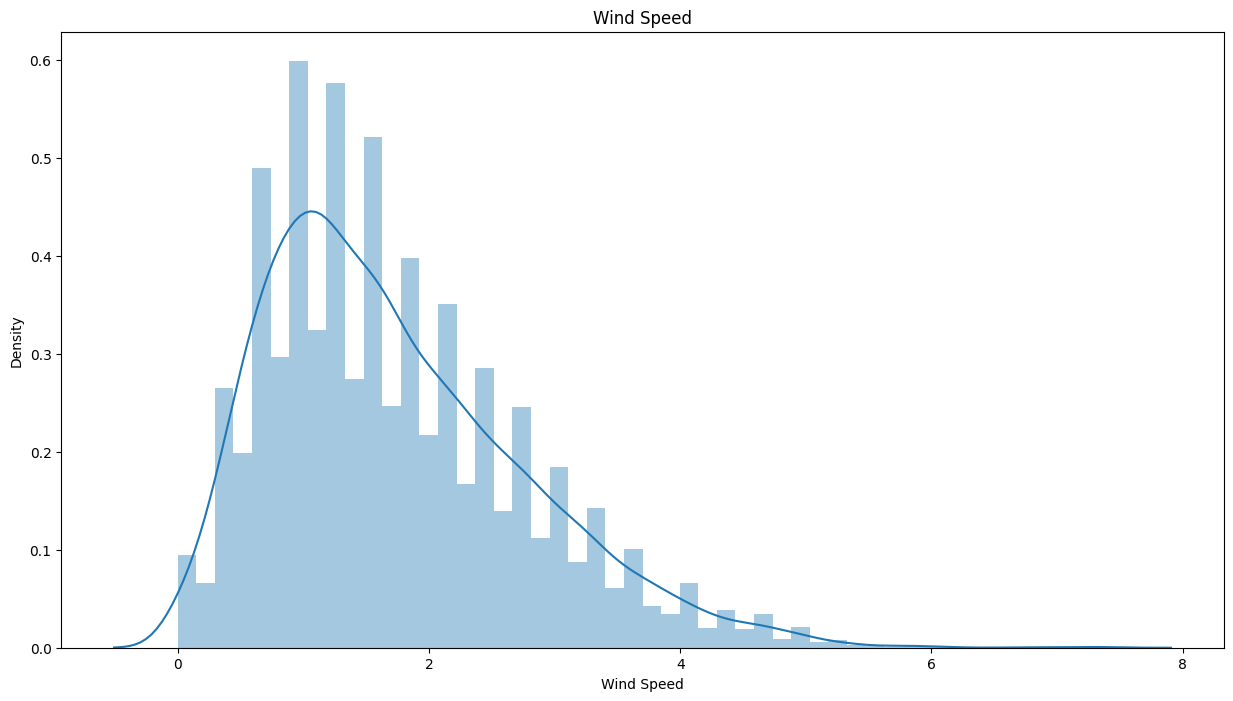

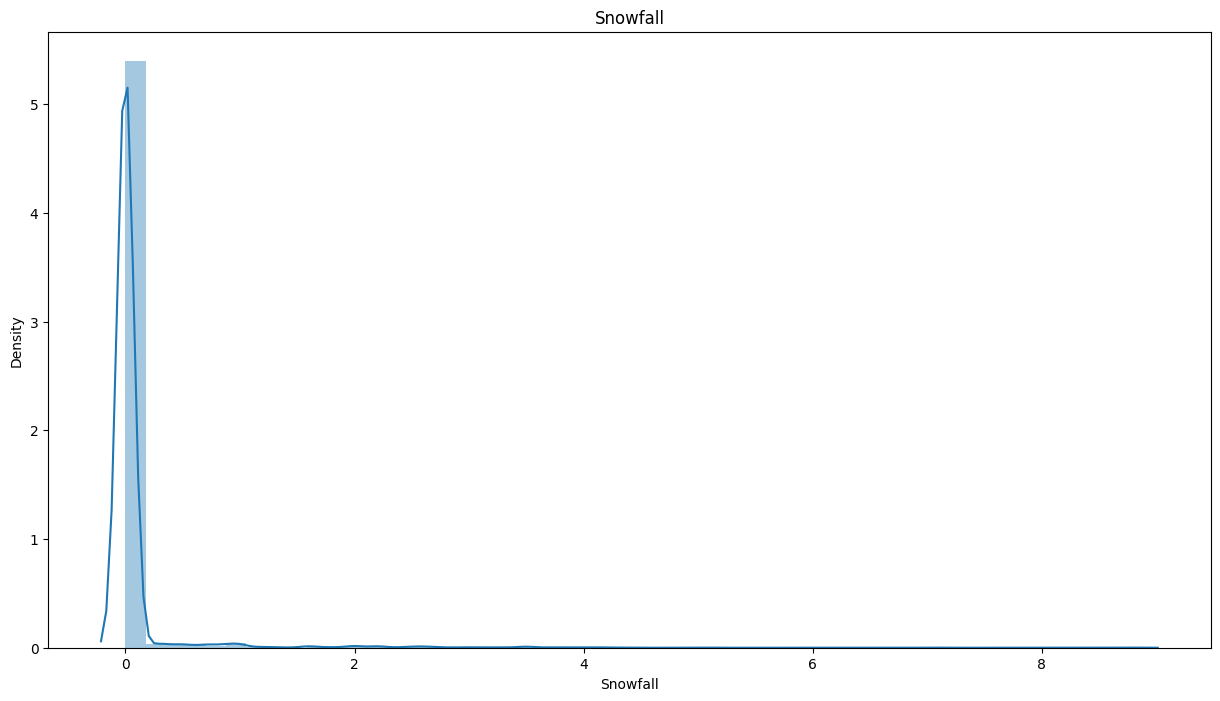

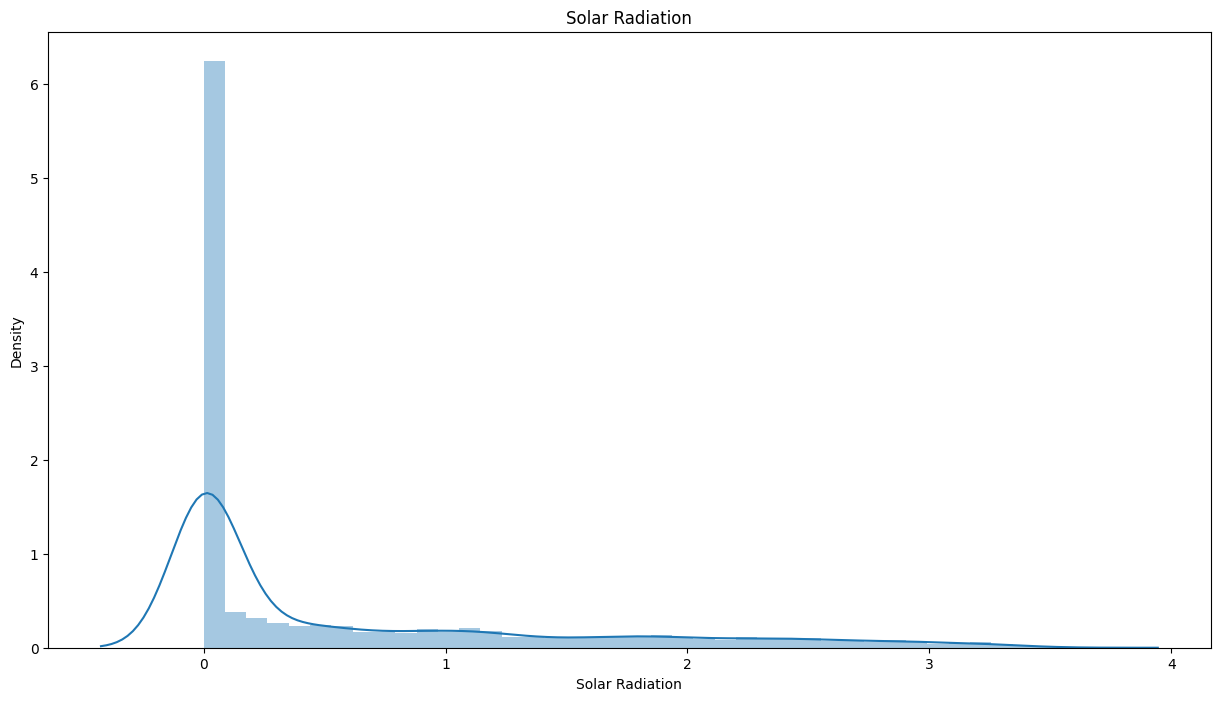

In [29]:
# Chart - 11 visualization code
for col in numerical_cols:
  if col not in ['Rented Bike Count']:
    plt.figure(figsize=(15,8))
    plt.title(col)
    sns.distplot(bike_data[col])
    plt.show()

##### 1. Why did you pick the specific chart?

- Distplot is a great choice to plot the data distribution.

##### 2. What is/are the insight(s) found from the chart?

- Solar radiation, Snowfall, Rainfall and Visibility are highly skewed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- It seems weather condition can affect the bike rent sales.

#### Chart - 12
- Plotting charts of the numerical columns after normalization

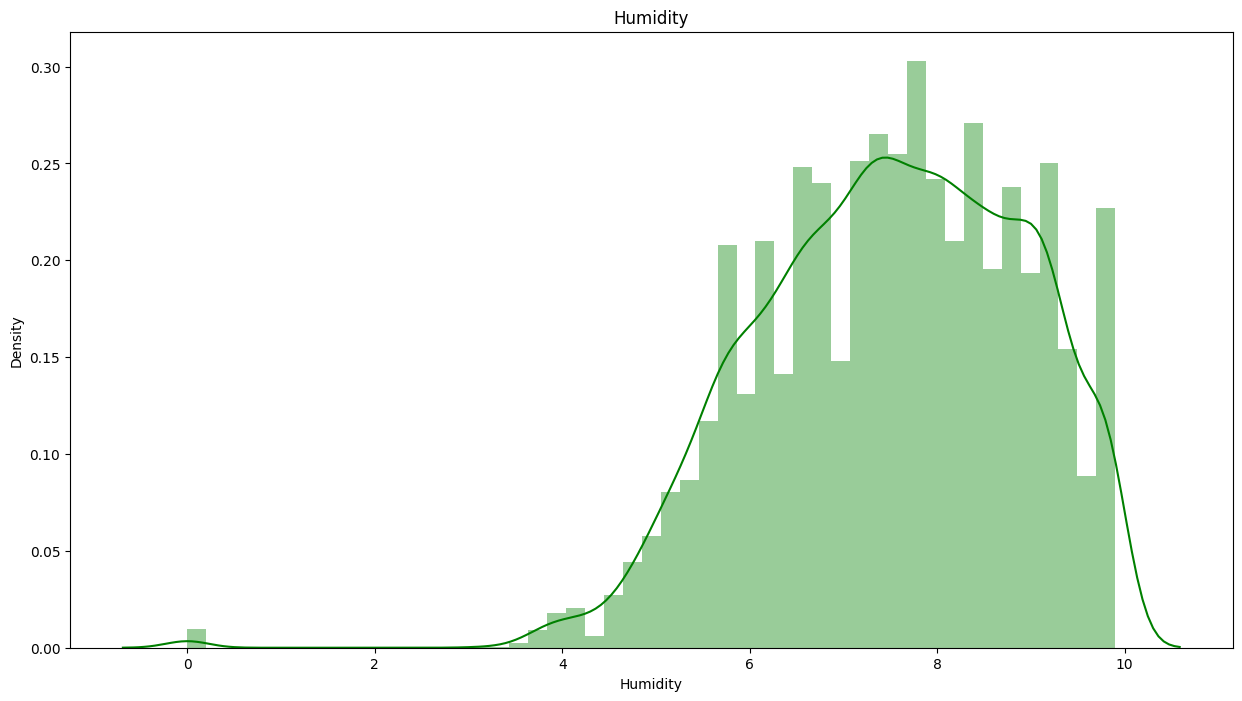

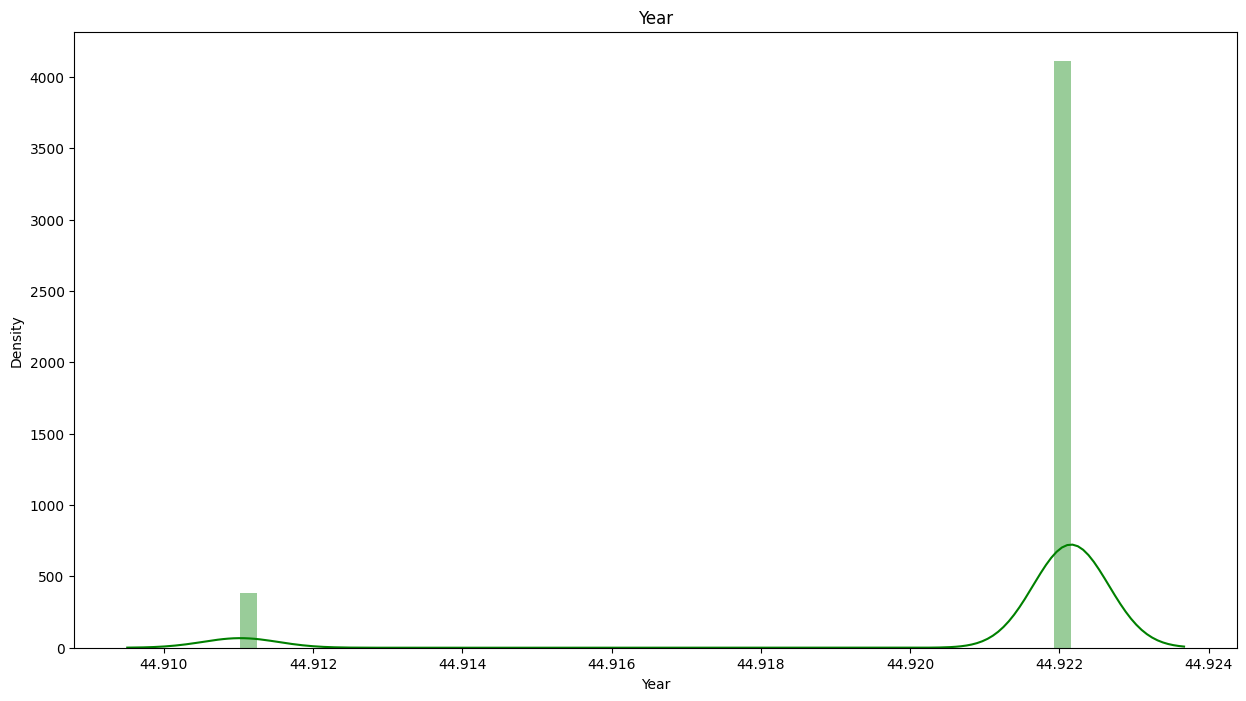

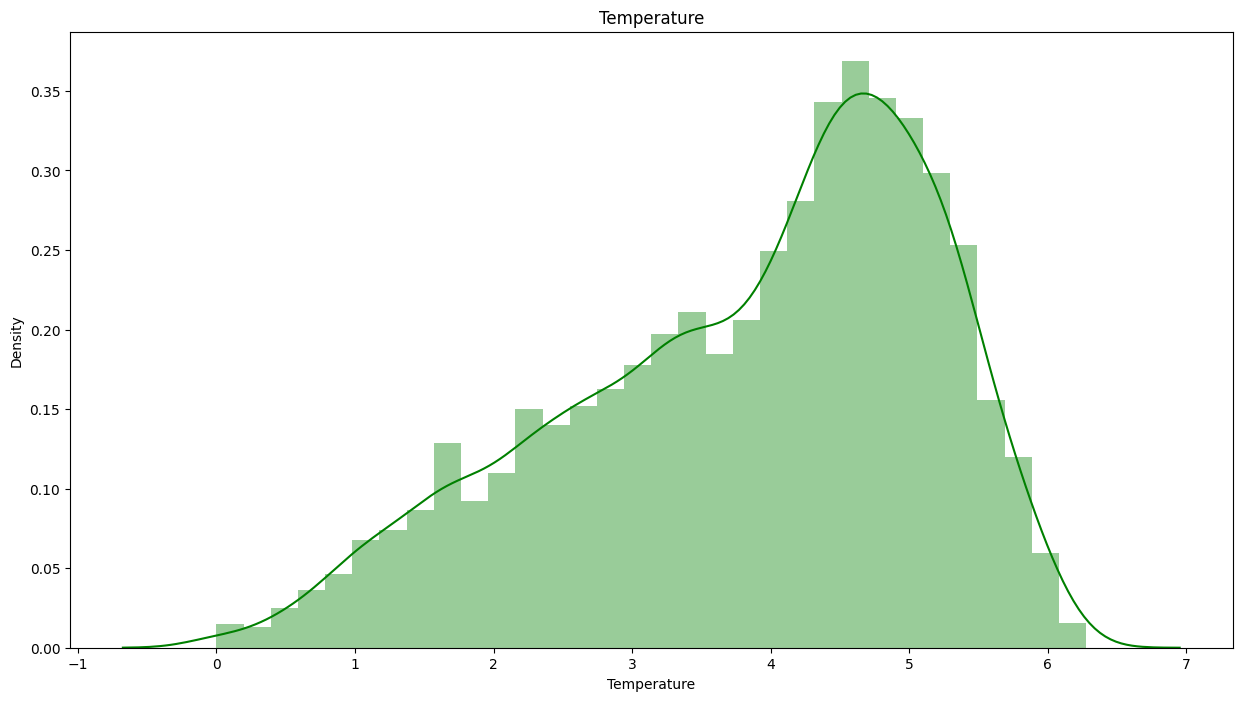

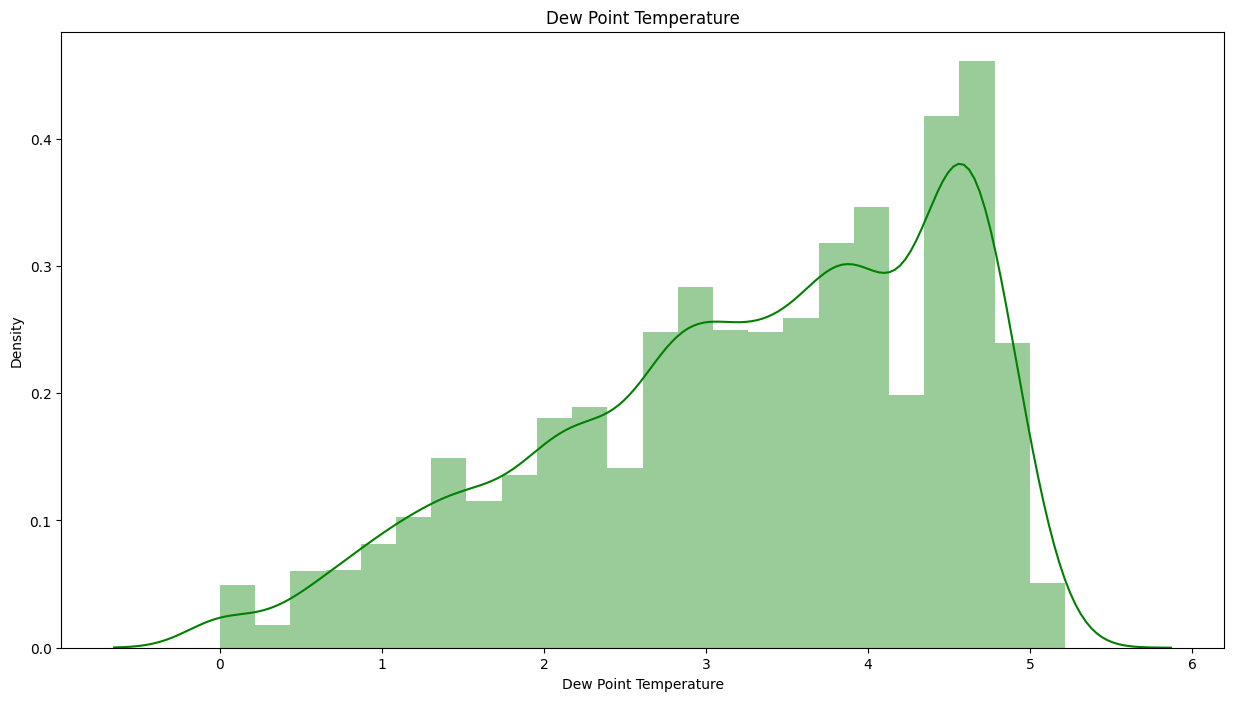

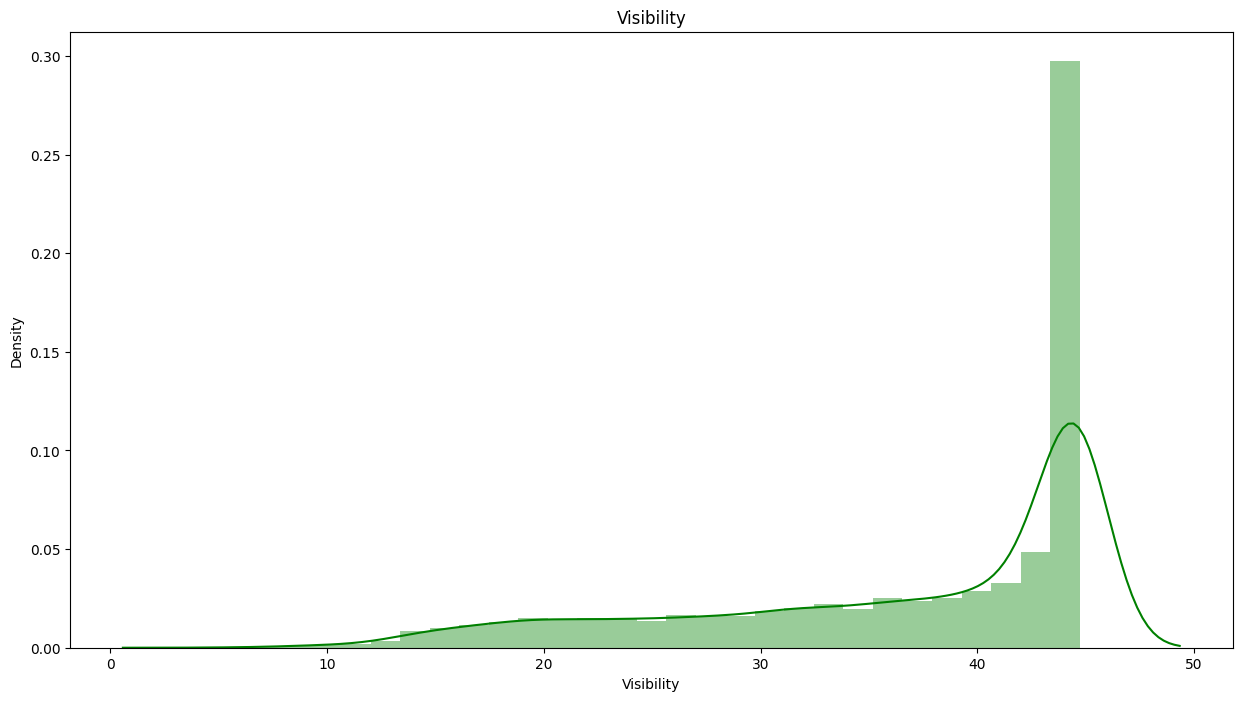

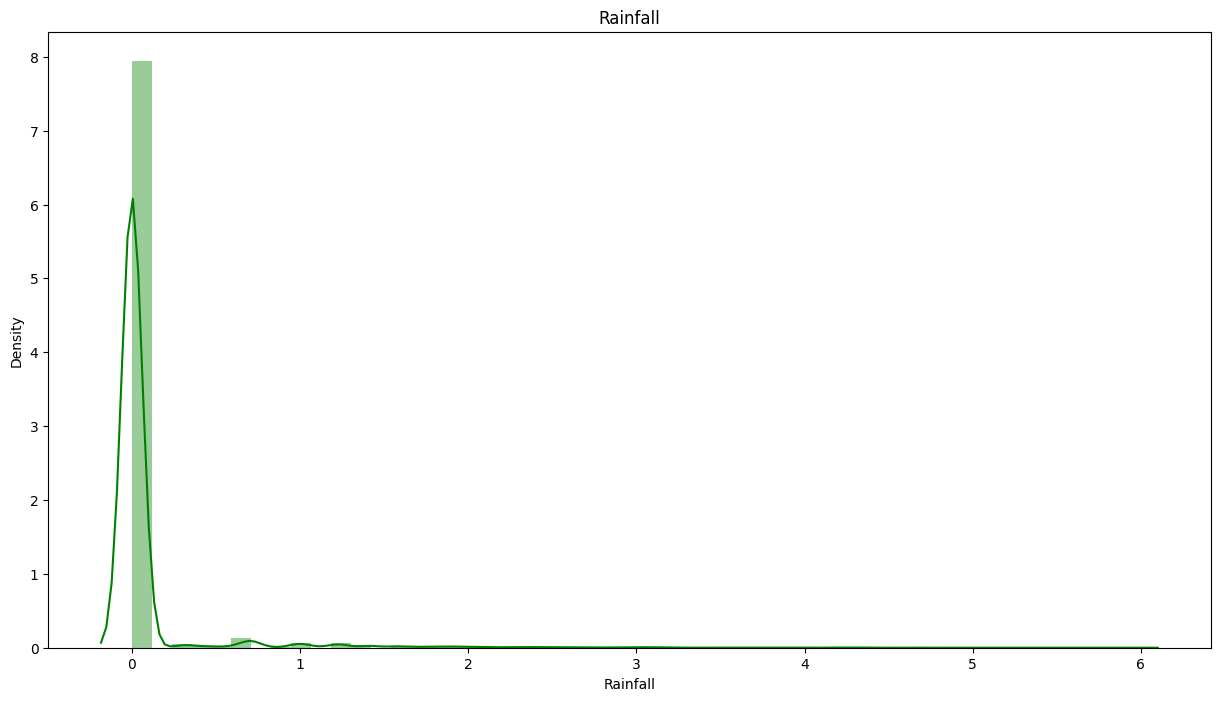

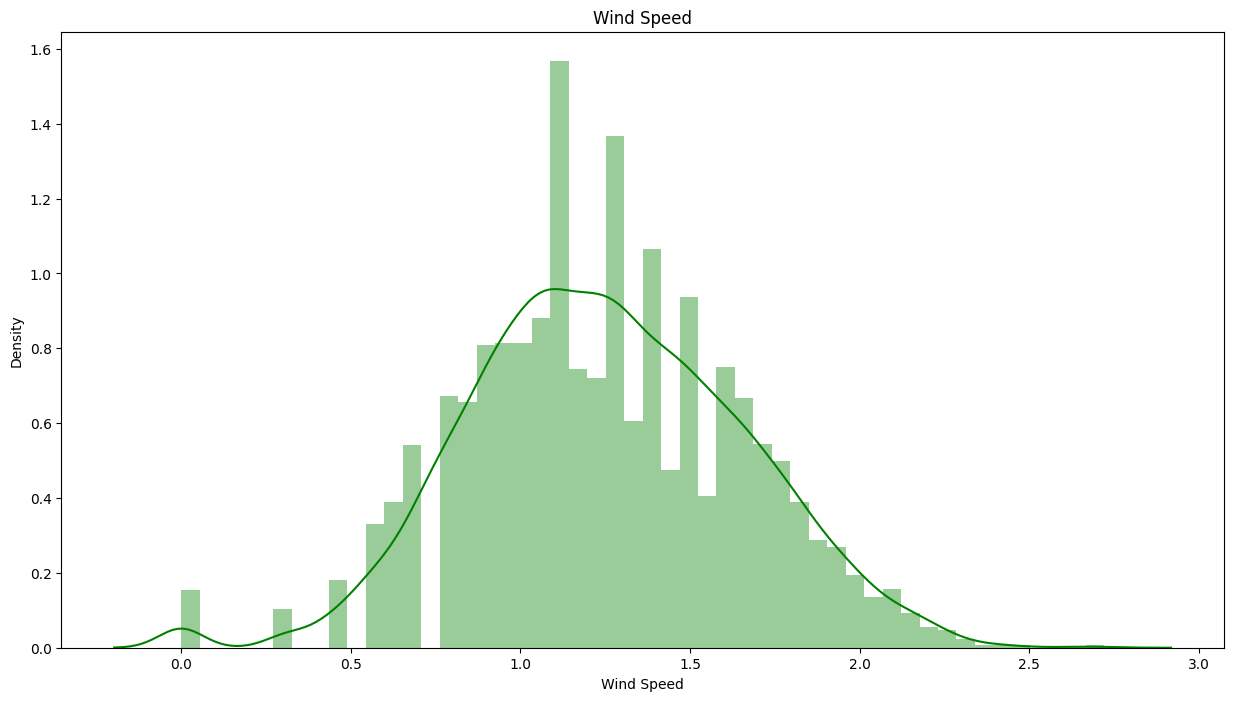

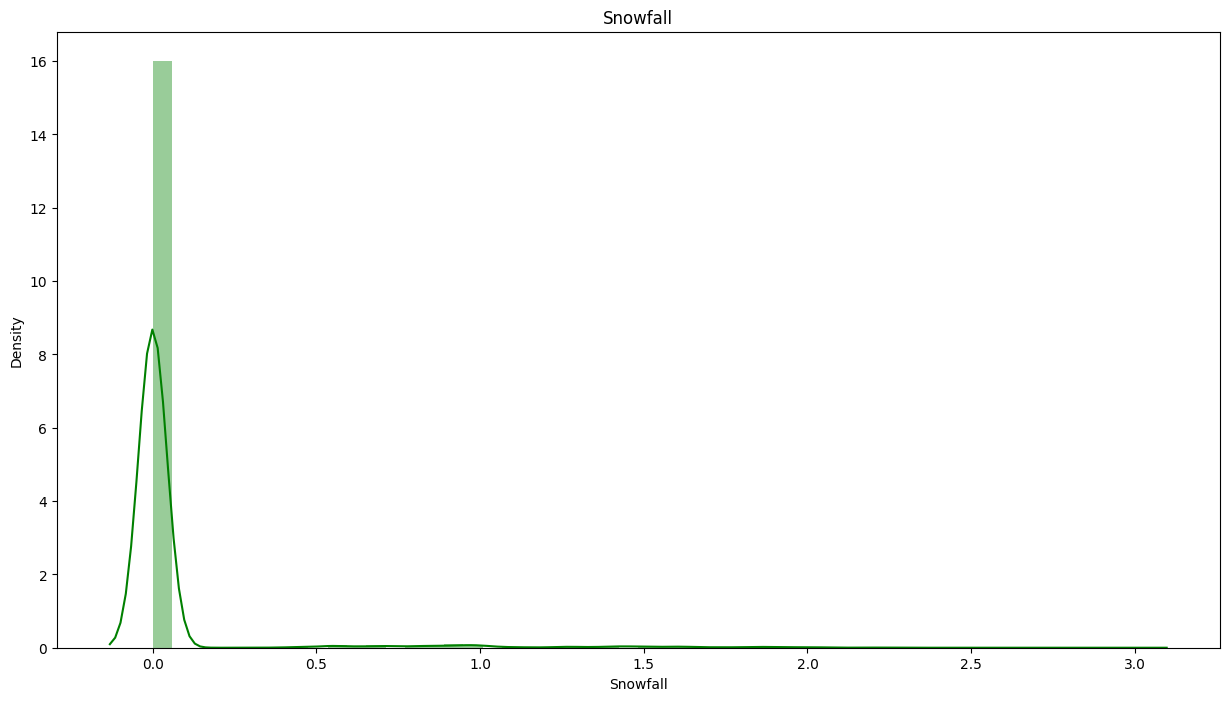

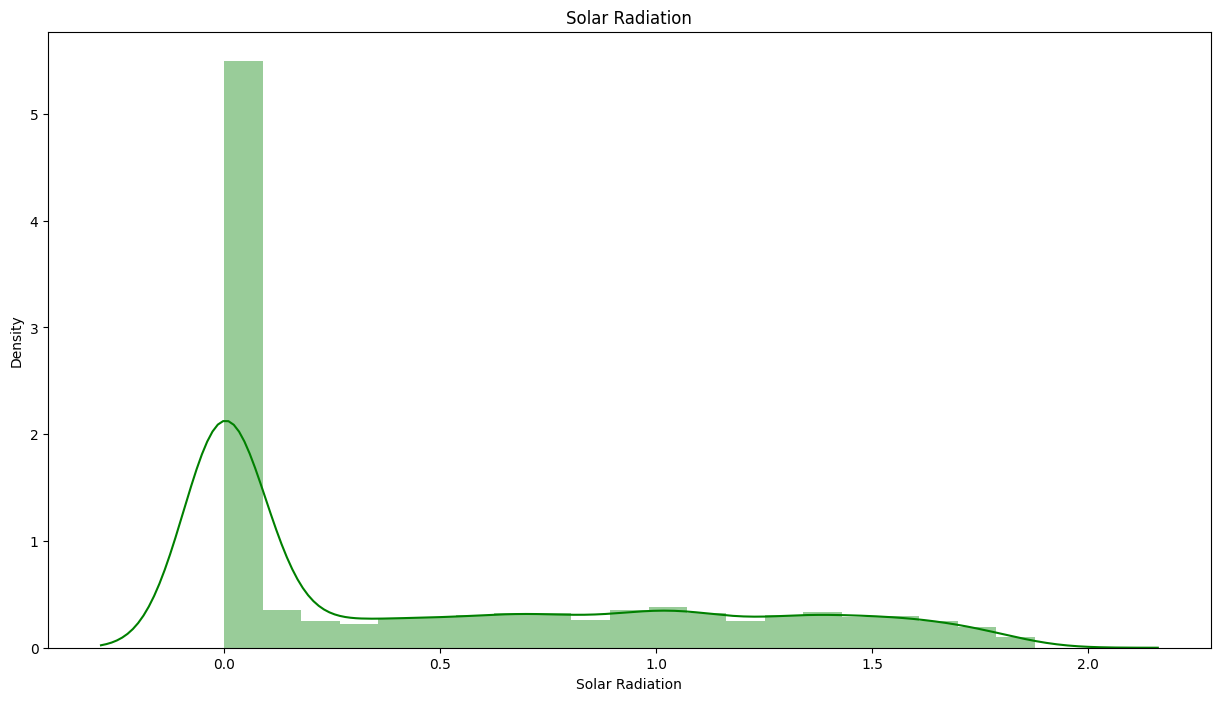

In [30]:
# Chart - 12 visualization code
for col in numerical_cols:
  if col not in ['Rented Bike Count']:
    plt.figure(figsize=(15,8))
    plt.title(col)
    sns.distplot(np.sqrt(bike_data[col]),color='g')
    plt.show()

##### 1. Why did you pick the specific chart?

- Distplot plots the data distribution in a way that is easy to interpret and understand.

##### 2. What is/are the insight(s) found from the chart?

Data distribution of following columns have shown improvements after normalization:

- Wind speed
- Dew point temperature
- Temperature
- Humidity

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- These improvements after normalization can improve the model performance.

#### Chart - 13
- Bike Rent Count growth chart

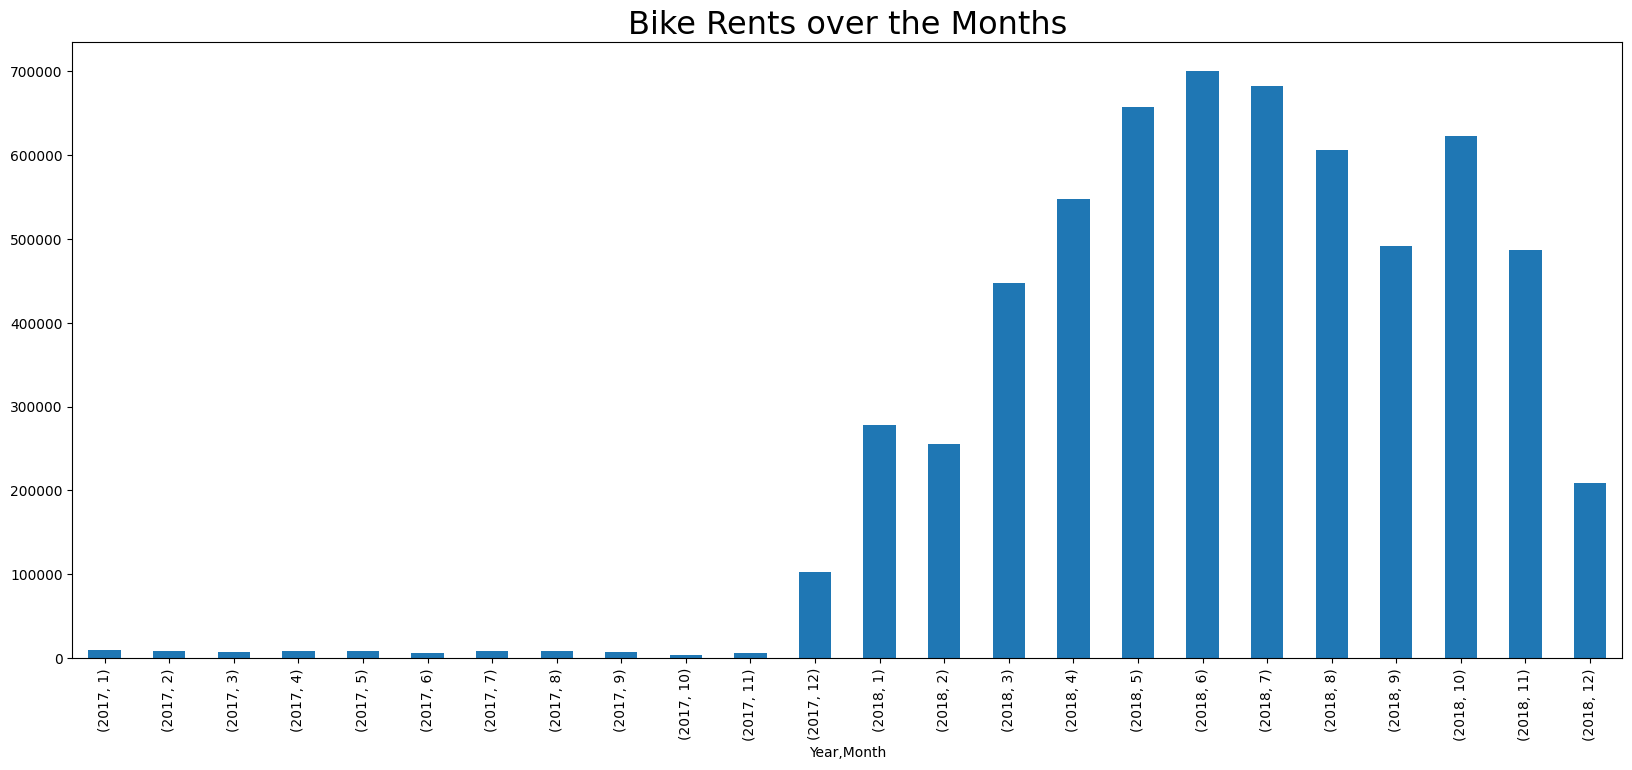

In [31]:
# Chart - 13 visualization code
year_month_rent_count = bike_data.groupby(['Year', 'Month'])['Rented Bike Count'].sum()
plt.rcParams['figure.figsize'] = (20, 8)
year_month_rent_count.plot.bar()
plt.title('Bike Rents over the Months',fontsize=23,y=1.0)
plt.show()

##### 1. Why did you pick the specific chart?

- A vertical bar chart is a good choice for this data because it shows the total number of bike rentals for each month

##### 2. What is/are the insight(s) found from the chart?

- The chart shows that the company had low bike rentals for the first 11 months of the year. However, there was a spike in rentals from December 2017.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- The company's sales remained flat for 11 months before finally showing signs of growth.

#### Chart - 14 - Correlation Heatmap

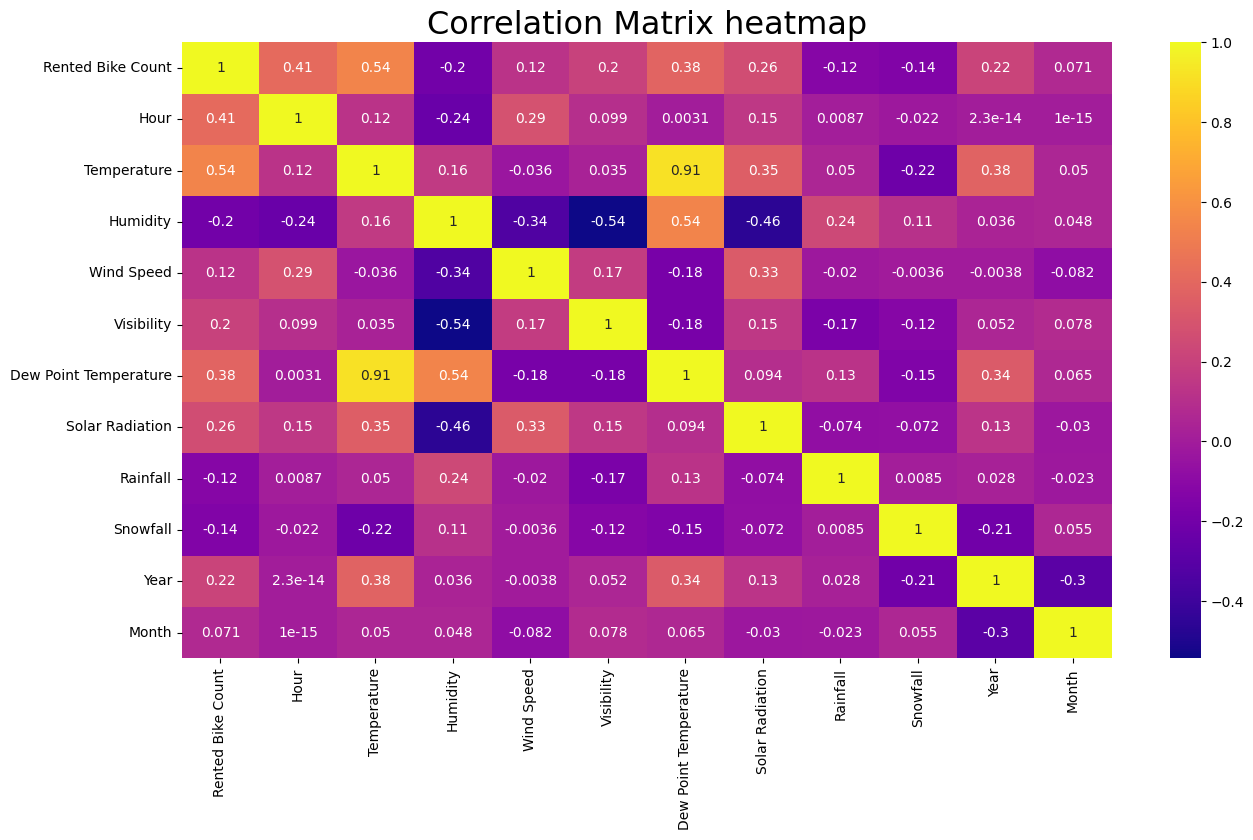

In [32]:
# Correlation Heatmap visualization code
corr_matrix = bike_data.corr()

# Plot heatmap
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True, cmap='plasma')

#setting labels to infer the plot
plt.title('Correlation Matrix heatmap',fontsize=23)
plt.show()

##### 1. Why did you pick the specific chart?

- The corelation chart shows the relation between the two specific features

##### 2. What is/are the insight(s) found from the chart?

- The colser the value to +1 indicates that the two variables are positively correlated.

- The closer the value to -1 indicates the tow variables are negativly correlated.

- The closer the value towards 0 is less correlation between the two variables.

#### Chart - 15 - Pair Plot

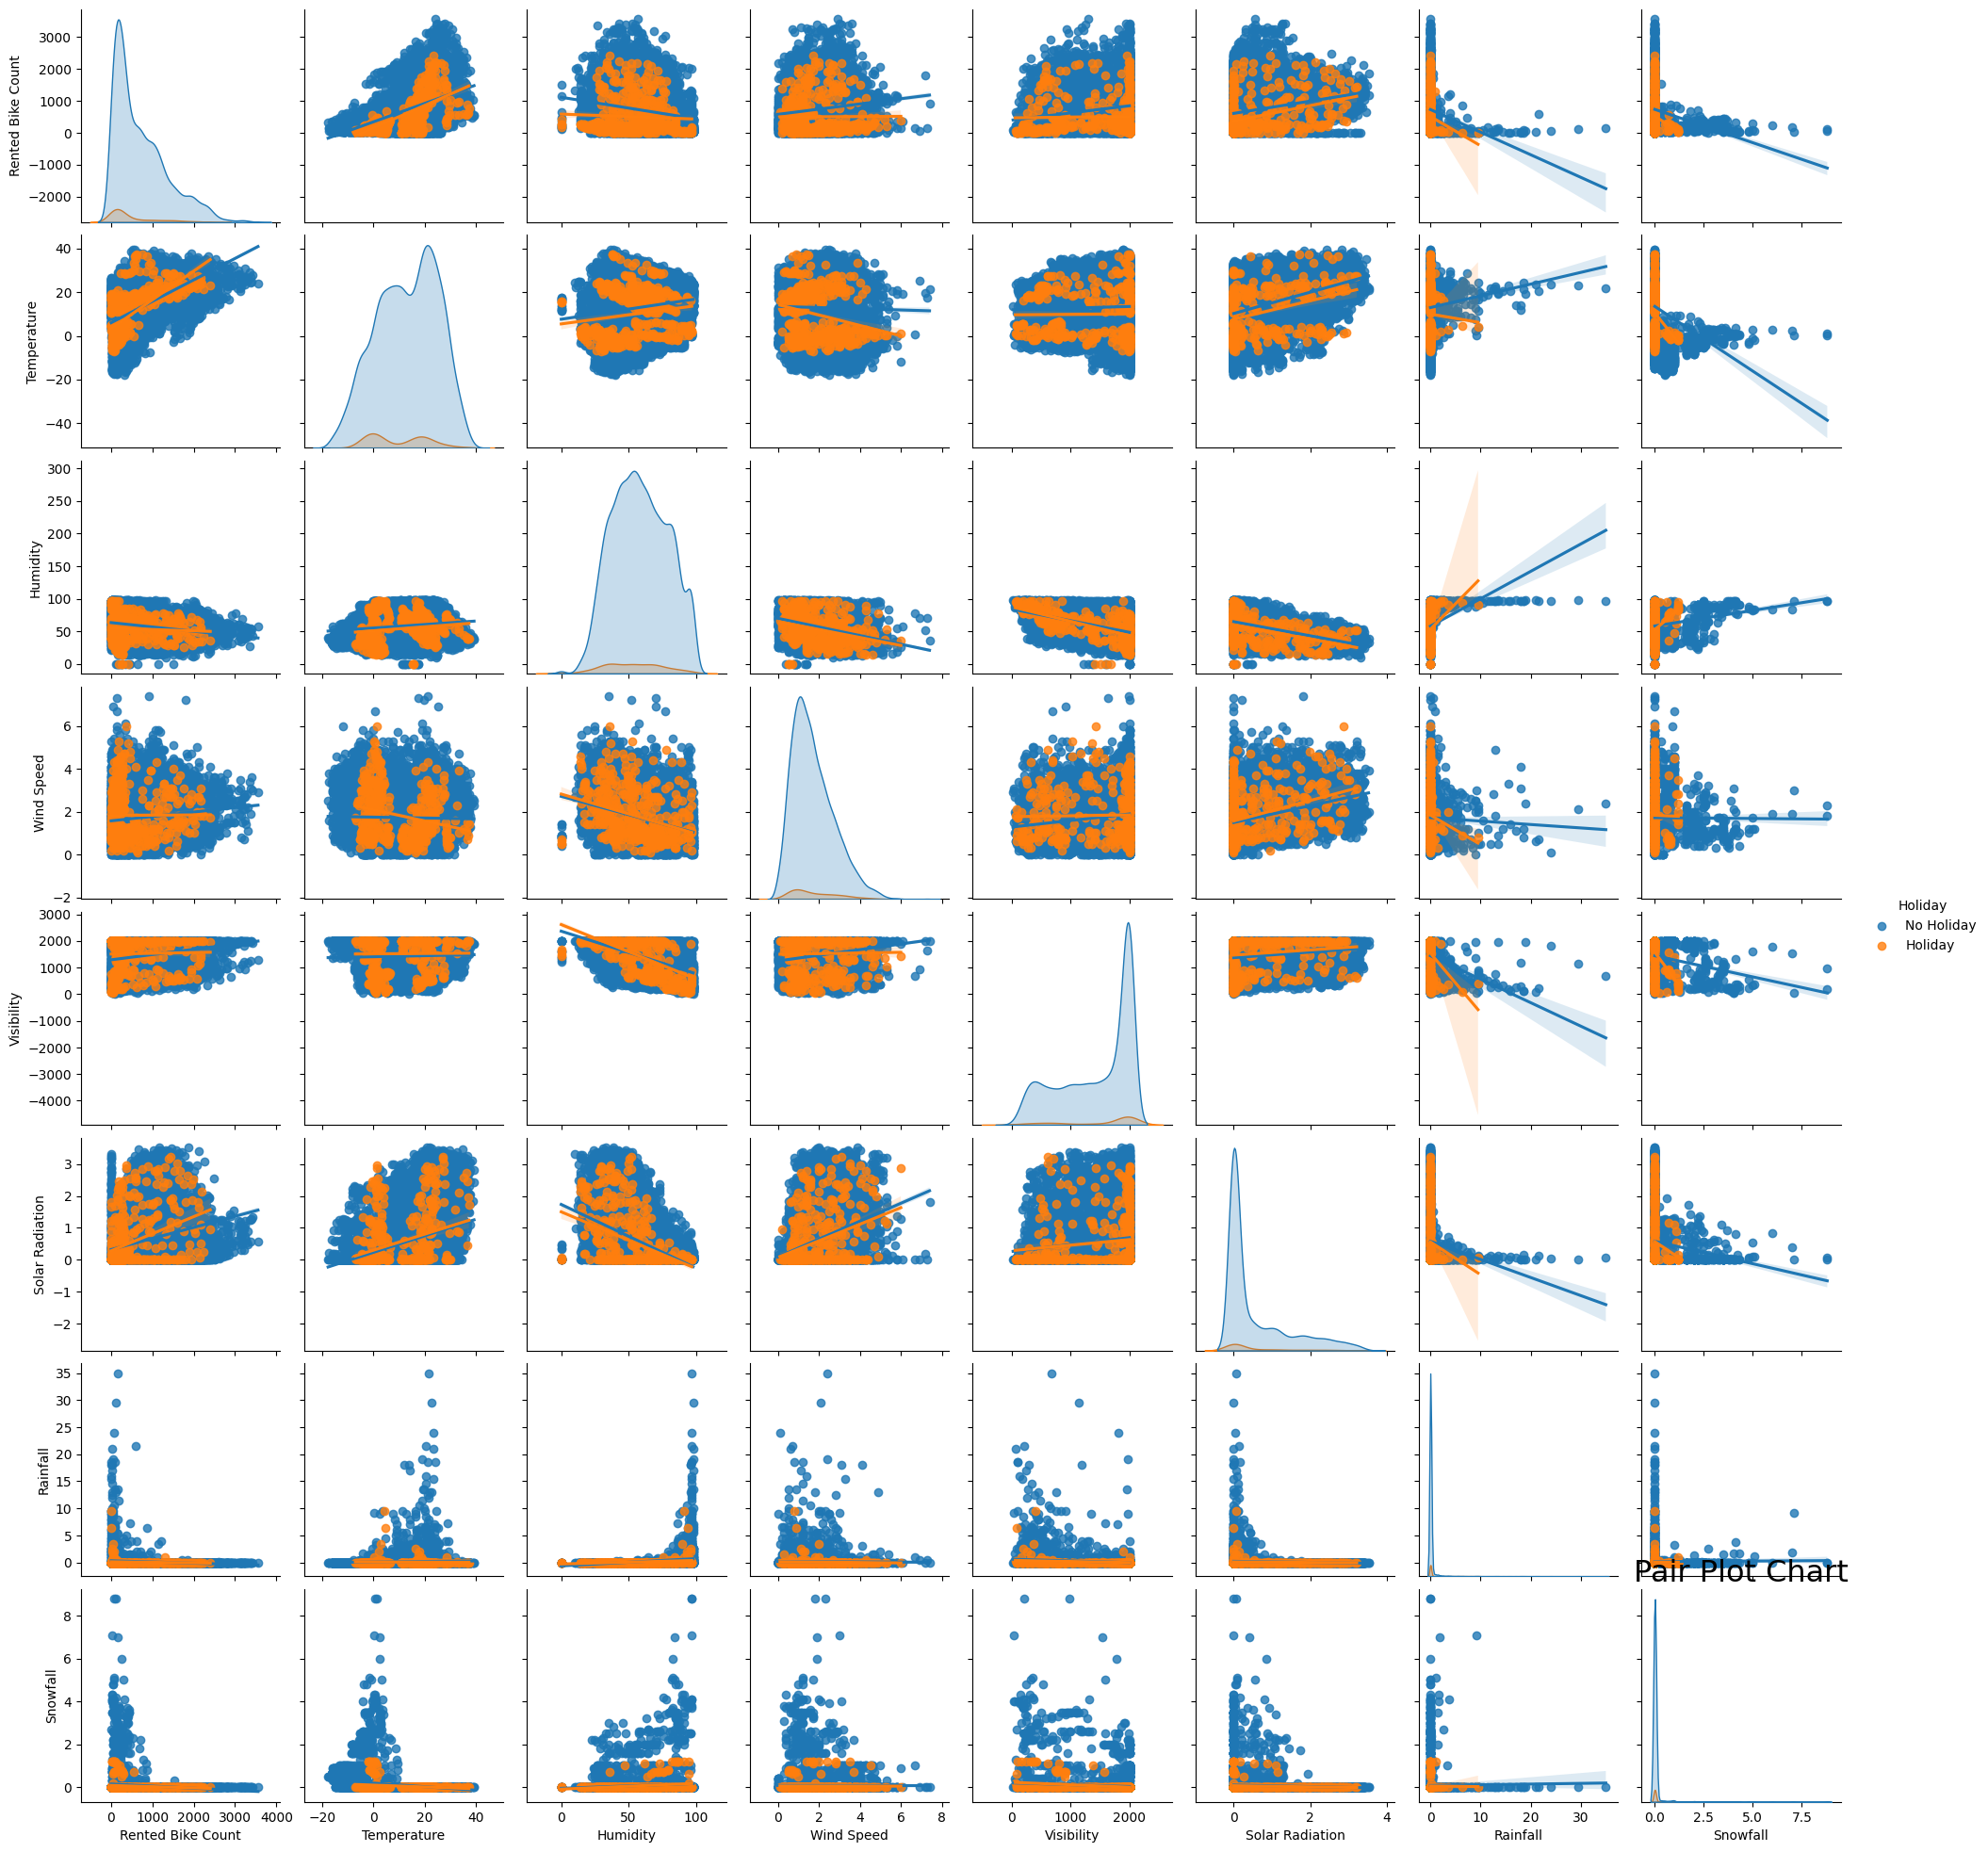

In [33]:
# Pair Plot visualization code
selected_features =['Rented Bike Count','Temperature', 'Humidity','Wind Speed', 'Visibility', 'Solar Radiation', 'Rainfall', 'Snowfall', 'Holiday']
pair_plot_df = bike_data[selected_features]

sns.pairplot(pair_plot_df, diag_kind="kde", kind = 'reg', hue = 'Holiday')

#setting labels to infer the plot
plt.title('Pair Plot Chart',fontsize=23)
plt.show()

##### 1. Why did you pick the specific chart?

- Pair plots are used to show relationship between various variables

- Pair plots can also help explore the distribution of variables in the dataset.

##### 2. What is/are the insight(s) found from the chart?

- We see that there is a positive correlation beween wind speed and sloar radiation.

- Temperature and rented bike count are highly corellated.

- Humidity and solar radiation are negativly corelated.

- The diagonal plots show the kernel density estimate (KDE) plotted with respect to the same feature. It is noted that the diagonal plots do not follow the same scale as the off-diagonal plots.


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null-Hypothesis : No relationship exists between 'month' and 'bike rented count' in Seoul
- Alternate-Hypothesis : Relationship exists between 'month' and 'bike rented count' in Seoul

#### 2. Perform an appropriate statistical test.

In [34]:
# Perform Statistical Test to obtain P-Value

# statsmodel package is used to perform statistical modeling and analysis
import statsmodels.api as sm

null_hypothesis = 'There exists no relationship between month and rented bike count'
alternate_hypothesis = 'There exists a relationship between month and rented bike count'

#linear regression
X= sm.add_constant(bike_data['Month'])
Y= bike_data['Rented Bike Count']
model = sm.OLS(Y,X).fit()

#summary stats
print(model.summary())

#extract p-value for temparature coefficient
pv = model.pvalues[1]
print(f'P-value : ',pv)

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     44.20
Date:                Tue, 04 Jul 2023   Prob (F-statistic):           3.14e-11
Time:                        19:26:07   Log-Likelihood:                -69078.
No. Observations:                8760   AIC:                         1.382e+05
Df Residuals:                    8758   BIC:                         1.382e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        618.0970     14.716     42.001      0.0

##### Which statistical test have you done to obtain P-Value?

- OLS(Ordinary Least Square) from the statsmodel package was used to perform a linear regression of bike demand on month.

- The P-value associated with month coefficient is shown under the "P>|t|" column and it is equal to 3.144647620349008e-11 in this case. As the P-value is less than the significance level of 0.005, so we reject the null-hypothesis and stat that the alternate-hypothesis is true.

##### Why did you choose the specific statistical test?

- The specific statistical test that was chosen in this case was OLS (Ordinary Least Squares) regression. This is because OLS regression is a parametric test that can be used to test the linear relationship between two variables. In this case, the two variables are bike demand and month.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null-Hypothesis : No relationship exists between 'hour' and 'bike rented count' in Seoul
- Alternate-Hypothesis : Relationship exists between 'hour and 'bike rented count' in Seoul

#### 2. Perform an appropriate statistical test.

In [35]:
# Perform Statistical Test to obtain P-Value
null_hypothesis = 'There exists no relationship between hour and rented bike count'
alternate_hypothesis = 'There exists a relationship between hour and rented bike count'

#linear regression
X= sm.add_constant(bike_data['Hour'])
Y= bike_data['Rented Bike Count']
model = sm.OLS(Y,X).fit()

#summary stats
print(model.summary())

#extract p-value for temparature coefficient
pv = model.pvalues[1]
print(f'P-value : ',pv)

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     1772.
Date:                Tue, 04 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:26:07   Log-Likelihood:                -68293.
No. Observations:                8760   AIC:                         1.366e+05
Df Residuals:                    8758   BIC:                         1.366e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        265.0158     12.187     21.745      0.0

##### Which statistical test have you done to obtain P-Value?

- OLS regression was used to analyze the relationship between bike demand and hour.
- The P-value associated with the hour coefficient was 0.0, which is less than the significance level of 0.005.
- Therefore, we can reject the null hypothesis and conclude that there is a statistically significant relationship between bike demand and hour.

##### Why did you choose the specific statistical test?

- OLS regression was chosen because it is a parametric test that can be used to test the linear relationship between two variables. The results of the test indicate that there is a statistically significant relationship between bike demand and hour. This means that the demand for bikes is likely to vary depending on the hour of the day.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null-Hypothesis : No relationship exists between 'temperature' and 'bike rented count' in Seoul
- Alternate-Hypothesis : Relationship exists between 'temperature' and 'bike rented count' in Seoul

#### 2. Perform an appropriate statistical test.

In [36]:
# Perform Statistical Test to obtain P-Value
null_hypothesis = 'There exists no relationship between temperature and rented bike count'
alternate_hypothesis = 'There exists a relationship between temperature and rented bike count'

#linear regression
X= sm.add_constant(bike_data['Temperature'])
Y= bike_data['Rented Bike Count']
model = sm.OLS(Y,X).fit()

#summary stats
print(model.summary())

#extract p-value for temparature coefficient
pv = model.pvalues[1]
print(f'P-value : ',pv)

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     3578.
Date:                Tue, 04 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:26:07   Log-Likelihood:                -67600.
No. Observations:                8760   AIC:                         1.352e+05
Df Residuals:                    8758   BIC:                         1.352e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         329.9525      8.541     38.631      

##### Which statistical test have you done to obtain P-Value?

- OLS regression was used to analyze the relationship between bike demand and hour.
- The P-value associated with the hour coefficient was 0.0, which is less than the significance level of 0.05.
- So, we can reject the null hypothesis and conclude that there is a statistically significant relationship between bike demand and temperature.

##### Why did you choose the specific statistical test?

- The specific statistical test that was chosen in this case was OLS (Ordinary Least Squares) regression. This is because OLS regression is a parametric test that can be used to test the linear relationship between two variables. In this case, the two variables are bike demand and temperature.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [37]:
# Handling Missing Values & Missing Value Imputation
bike_data.isnull().sum()

Rented Bike Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind Speed               0
Visibility               0
Dew Point Temperature    0
Solar Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning Day          0
Year                     0
Month                    0
Day                      0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

- No missing values in the dataset

### 2. Handling Outliers

##### What all outlier treatment techniques have you used and why did you use those techniques?

Through the data analysis we found out that:

- Wind Speed
- Solar Radiation
- Rainfall
- Snowfall

contain many outliers

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [38]:
# Manipulate Features to minimize feature correlation and create new features
def vif_checker(val):
  #calculating vif
  vif = pd.DataFrame()
  vif['variables'] = val.columns
  vif['VIF'] = [variance_inflation_factor(val.values, i) for i in range(val.shape[1])]
  return(vif)

In [39]:
vif_checker(bike_data[[i for i in bike_data.describe().columns if i not in ['Rented Bike Count']]])

variables         VIF
0                    Hour    4.454430
1             Temperature  188.537954
2                Humidity  186.884974
3              Wind Speed    4.838265
4              Visibility   10.458051
5   Dew Point Temperature  126.994440
6         Solar Radiation    2.889097
7                Rainfall    1.103869
8                Snowfall    1.133219
9                    Year  400.442502
10                  Month    4.721494

In [40]:
vif_checker(bike_data[[i for i in bike_data.describe().columns if i not in ['Dew Point Temperature']]])

variables        VIF
0   Rented Bike Count   4.159294
1                Hour   5.050554
2         Temperature   4.918323
3            Humidity  24.366948
4          Wind Speed   4.832676
5          Visibility  10.395596
6     Solar Radiation   2.784318
7            Rainfall   1.110231
8            Snowfall   1.128059
9                Year  56.019613
10              Month   4.739159

In [41]:
vif_checker(bike_data[[i for i in bike_data.describe().columns if i not in ['Dew Point Temperature','Humidity','Visibility','Year']]])

variables       VIF
0  Rented Bike Count  3.883992
1               Hour  4.420101
2        Temperature  3.361637
3         Wind Speed  3.729333
4    Solar Radiation  1.894759
5           Rainfall  1.070620
6           Snowfall  1.079310
7              Month  2.967952

- A variance inflation factor(VIF) detects multicollinearity in regression analysis. Multicollinearity is when there’s correlation between predictors (i.e. independent variables) in a model; it’s presence can adversely affect your regression results.

#### 2. Feature Selection

In [42]:
# Select your features wisely to avoid overfitting
# By creating a copy, we ensure that any changes made to the new DataFrame do not affect the original DataFrame
df = bike_data.copy()

features = list(set(df.describe().columns)- set(['Dew Point Temperature','Humidity','Visibility','Year']))
features


['Rented Bike Count',
 'Temperature',
 'Solar Radiation',
 'Wind Speed',
 'Hour',
 'Snowfall',
 'Rainfall',
 'Month']

##### What all feature selection methods have you used  and why?

A rule of thumb for interpreting the variance inflation factor:

- 1 = not correlated.
- Between 1 and 5 = moderately correlated.
- Greater than 5 = highly correlated.

So we remove all the features that had a VIF greater than 5.

##### Which all features you found important and why?

We removed the following features as their VIF score was greater tha 5:

- Dew Point Temperature
- Humidity
- Visibility
- Year

#### 3. Categorical Encoding

In [43]:
# Encode your categorical columns
# Convert 'Seasons' column to dummy variables
seasons_dummies = pd.get_dummies(df['Seasons'])
df = pd.concat([df, seasons_dummies], axis=1)

#dropping Seasons and Day columns
df.drop(['Seasons','Day'], axis=1, inplace=True)

# Convert 'Holiday' column to binary form
df['Holiday'] = np.where(df['Holiday'] == 'Holiday', 1, 0)

# Convert 'Functioning Day' column to binary form
df['Functioning Day'] = np.where(df['Functioning Day'] == 'Yes', 1, 0)

# The 'Month' and 'Hour' columns will be replaced with dummy variables with appropriate prefixes
columns_to_convert = ['Month', 'Hour']
for column in columns_to_convert:
    dummies = pd.get_dummies(df[column], prefix=column, drop_first=True)
    df = pd.concat([df, dummies], axis=1)
    df.drop(column, axis=1, inplace=True)

# Print the info of the DataFrame after all the transformations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 50 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented Bike Count      8760 non-null   int64  
 1   Temperature            8760 non-null   float64
 2   Humidity               8760 non-null   int64  
 3   Wind Speed             8760 non-null   float64
 4   Visibility             8760 non-null   int64  
 5   Dew Point Temperature  8760 non-null   float64
 6   Solar Radiation        8760 non-null   float64
 7   Rainfall               8760 non-null   float64
 8   Snowfall               8760 non-null   float64
 9   Holiday                8760 non-null   int64  
 10  Functioning Day        8760 non-null   int64  
 11  Year                   8760 non-null   int64  
 12  Autumn                 8760 non-null   uint8  
 13  Spring                 8760 non-null   uint8  
 14  Summer                 8760 non-null   uint8  
 15  Wint

#### What all categorical encoding techniques have you used & why did you use those techniques?

- For the Seasons column, we created four new columns:
One column for each of the four seasons: winter, spring, summer, and fall.
We encoded each column as 1 if the value in the Seasons column was equal to the name of the column, and 0 otherwise.
For example, if the value in the Seasons column was "winter", then the value in the winter column would be 1.
The other three columns would be 0.

- We did the same thing for the Holiday and Functioning Day columns.
For the Holiday column, we encoded 1 for holiday and 0 for functioning day.
For the Functioning Day column, we encoded 1 for functioning day and 0 for holiday.
- For the Month and Hour columns, we used one-hot encoding.
One-hot encoding is a technique that creates a new column for each unique value in a categorical column.
The value in each new column is 1 if the value in the original column is equal to the name of the column, and 0 otherwise.
- We dropped the first column of each encoded column.
This is because the first column typically represents the "no value" category, and we don't need it for our machine learning model.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [44]:
# Transform Your data

### 8. Data Splitting

In [45]:
# Split your data to train and test. Choose Splitting ratio wisely.
x = df.drop(columns=['Rented Bike Count'], axis=1)
y = np.sqrt(df['Rented Bike Count'])
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.20,random_state=4)

In [46]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(7008, 49) (7008,)
(1752, 49) (1752,)


##### What data splitting ratio have you used and why?

- 80:20 standard ratio

### 6. Data Scaling

##### Which method have you used to scale you data and why?

- MinMax Scaler was used to standardize the data.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [47]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

In [48]:
# initiating train & test dictionary for future reference and  to compare values
train = {}
test = {}

In [49]:

def modelfit(model, X_train, X_test, y_train, y_test, output_name):
    '''
    This function implements the given model, calculates the statistics, and adds the results to train and test dictionaries.
    '''
    # Fit the model
    model.fit(X_train, y_train)
    score = model.score(X_train, y_train)
    print(f'The score for {output_name} is: {score}')

    # Predict on the model
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    print('\n' + '*' * 50)
    print(f'Evaluation Metrics for {output_name} train dataset')
    print('*' * 50)

    # Calculate and print mean squared error
    MSE = mean_squared_error(y_train, y_pred_train)
    print(f'MSE score is : {MSE}')

    mae = mean_absolute_error(y_train, y_pred_train)
    print(f'Mean Absolute Error score is : {mae}')

    # Calculate and print root mean square error (RMSE)
    RMSE = np.sqrt(MSE)
    print(f'RMSE score is : {RMSE}')

    # Calculate and print r^2 score
    r2 = r2_score(y_train, y_pred_train)
    print(f'R2 score is : {r2}')

    # Calculate and print Adjusted r^2
    # Formula => Adjusted R-squared = 1 - [(1 - R-squared) * (n - 1) / (n - p - 1)]
    a_r2 = 1 - (1 - r2) * ((X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1] - 1))
    print(f'Adjusted R^2 score is : {a_r2}')
    print('\n')

    # Update the observed values to the train dictionary for future references
    train[output_name] = MSE, mae, RMSE, r2, a_r2

    print('*' * 50)
    print(f'Evaluation Metrics for {output_name} test dataset')
    print('*' * 50)

    # Calculate and print mean squared error for test dataset
    MSE = mean_squared_error(y_test, y_pred_test)
    print(f'MSE score is : {MSE}')

    mae = mean_absolute_error(y_test, y_pred_test)
    print(f'Mean Absolute Error is : {mae}')

    # Calculate and print root mean square error (RMSE) for test dataset
    RMSE = np.sqrt(MSE)
    print(f'RMSE score : {RMSE}')

    # Calculate and print r^2 score for test dataset
    r2 = r2_score(y_test, y_pred_test)
    print(f'R2 score is : {r2}')

    # Calculate and print Adjusted r^2 for test dataset
    a_r2 = 1 - (1 - r2) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))
    print(f'Adjusted R^2 score is : {a_r2}')
    print('\n')

    # Update the observed values to the test dictionary for future references
    test[output_name] = MSE, mae, RMSE, r2, a_r2

    # Plot the actual vs. predicted values
    plt.figure(figsize=(10, 5))
    plt.title(f'Actual value vs. Predicted value for {output_name}')
    # plt.plot(np.array(y_pred_test))
    # plt.plot(np.array(y_test))
    sns.regplot(x=np.array(y_test), y=np.array(y_pred_test), scatter_kws={'color':'red'},line_kws={'color':'black'})
    plt.legend(["Predicted", "Actual"])
    plt.show()



### ML Model - 1
- ## Linear Regression

The score for Linear Regression is: 0.7619132888572128

**************************************************
Evaluation Metrics for Linear Regression train dataset
**************************************************
MSE score is : 36.74374909259043
Mean Absolute Error score is : 4.5997281098744445
RMSE score is : 6.061662238412037
R2 score is : 0.7619132888572128
Adjusted R^2 score is : 0.760236621877334


**************************************************
Evaluation Metrics for Linear Regression test dataset
**************************************************
MSE score is : 38.10238119164575
Mean Absolute Error is : 4.678100540593799
RMSE score : 6.172712628305788
R2 score is : 0.7583937681568099
Adjusted R^2 score is : 0.751438007075543




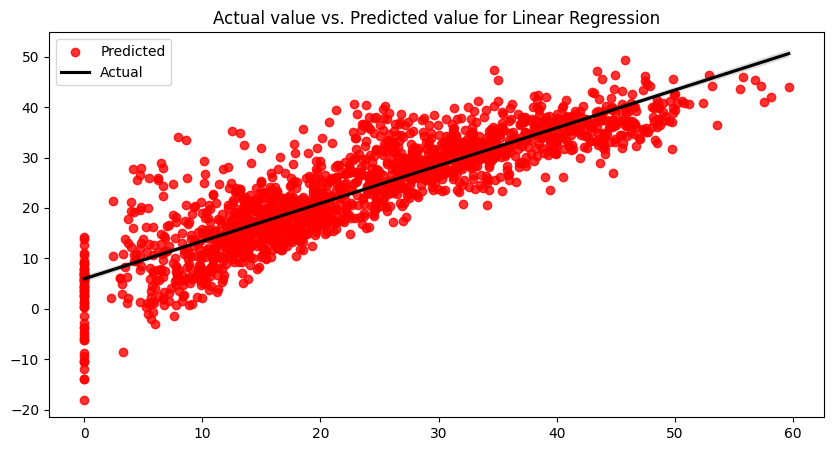

In [50]:
# ML Model - 1 Implementation

Lin_Reg = LinearRegression()
modelfit(Lin_Reg, X_train, X_test, y_train, y_test, 'Linear Regression')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.



- Linear regression is a statistical method that is used to find a linear relationship between two variables. The independent variable is the variable that is believed to cause the change in the dependent variable. The dependent variable is the variable that is being predicted.

- Linear regression works by finding the line that best fits the data points

#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

- For the Linear Regression model we do not necessarily have to do hyper parameter optimization

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

- Adjusted R^2 on the train dataset is : 0.739675836524603

- Adjusted R^2 on the test dataset is : 0.7403961072974534

### ML Model - 2

- ## Lasso Regression

The score for Lasso without Hyperparameter Tuning is: 0.40841366103593957

**************************************************
Evaluation Metrics for Lasso without Hyperparameter Tuning train dataset
**************************************************
MSE score is : 91.2990897356856
Mean Absolute Error score is : 7.233668865319903
RMSE score is : 9.555055715990651
R2 score is : 0.40841366103593957
Adjusted R^2 score is : 0.40424756005731943


**************************************************
Evaluation Metrics for Lasso without Hyperparameter Tuning test dataset
**************************************************
MSE score is : 98.8701099557872
Mean Absolute Error is : 7.522748947163132
RMSE score : 9.943345008385618
R2 score is : 0.37306714275439634
Adjusted R^2 score is : 0.35501795943768977




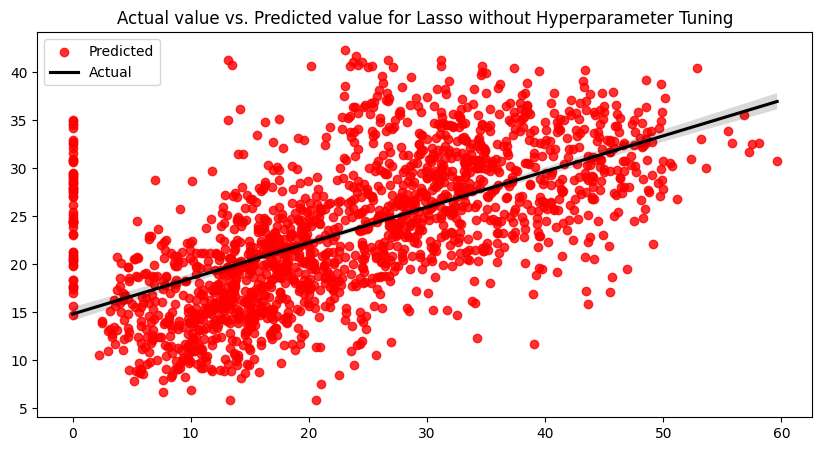

In [51]:
# Visualizing evaluation Metric Score chart
lasso = Lasso()
modelfit(lasso, X_train, X_test, y_train, y_test, 'Lasso without Hyperparameter Tuning')

In [52]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

#Hyperparameter tuning
lasso = Lasso()

# Define the hyperparameter grid to search for the best alpha value
parameters = {
    'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100]
}

# Perform grid search using cross-validation
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

# Print the best alpha value found during grid search
print(f'The best fit alpha value is found out to be: {lasso_regressor.best_params_}')

# Print the negative mean squared error using the best alpha value
print(f'Using {lasso_regressor.best_params_}, the negative mean squared error is: {lasso_regressor.best_score_}')

The best fit alpha value is found out to be: {'alpha': 0.001}
Using {'alpha': 0.001}, the negative mean squared error is: -37.45050740914012


The score for Lasso Regression with Hyperparameter Tuning is: 0.7619132109807374

**************************************************
Evaluation Metrics for Lasso Regression with Hyperparameter Tuning train dataset
**************************************************
MSE score is : 36.743761111210276
Mean Absolute Error score is : 4.599695185953913
RMSE score is : 6.061663229775329
R2 score is : 0.7619132109807374
Adjusted R^2 score is : 0.7602365434524327


**************************************************
Evaluation Metrics for Lasso Regression with Hyperparameter Tuning test dataset
**************************************************
MSE score is : 38.10576998139079
Mean Absolute Error is : 4.678269728301752
RMSE score : 6.172987119814101
R2 score is : 0.7583722799270667
Adjusted R^2 score is : 0.7514159002069881




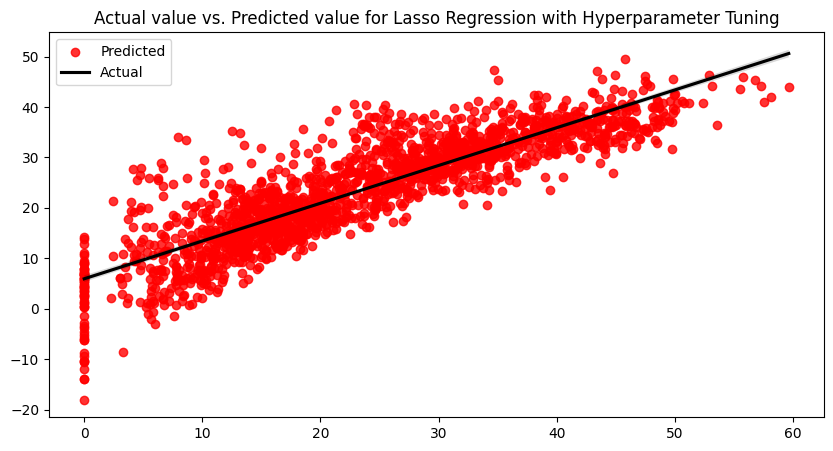

In [53]:
#Lasso model implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lasso=Lasso(alpha=0.0001,max_iter=4000)
modelfit(lasso, X_train, X_test, y_train, y_test, 'Lasso Regression with Hyperparameter Tuning')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

- Lasso, also known as L1 regularization, is a linear regression technique used in machine learning and statistics to prevent overfitting and select a subset of important features from a larger set of predictors.
- It adds a penalty term to the linear regression objective function, which is the absolute value of the coefficients multiplied by a tuning parameter called the regularization strength.
- This penalty encourages the model to shrink the coefficients of less important features to exactly zero, effectively eliminating them from the model.
- This results in a sparse model with a subset of predictors that are most relevant to the prediction task, making it useful for feature selection and model interpretability.
- Lasso is particularly effective when dealing with datasets that have a large number of predictors and may suffer from multicollinearity, as it can automatically perform feature selection and regularization simultaneously.

#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

- We have used GridSearch CV as the hyperparameter optimization technique. It finds the optimal aplha value for the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

- No

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3
- ## Ridge Regression

The score for Ridge Regression without Hyperparameter Tuning is: 0.7619067687476576

**************************************************
Evaluation Metrics for Ridge Regression without Hyperparameter Tuning train dataset
**************************************************
MSE score is : 36.74475533635935
Mean Absolute Error score is : 4.600844912834158
RMSE score is : 6.061745238490261
R2 score is : 0.7619067687476576
Adjusted R^2 score is : 0.7602300558515144


**************************************************
Evaluation Metrics for Ridge Regression without Hyperparameter Tuning test dataset
**************************************************
MSE score is : 38.12955545546136
Mean Absolute Error is : 4.681020636603885
RMSE score : 6.174913396596049
R2 score is : 0.7582214568398196
Adjusted R^2 score is : 0.751260734974456




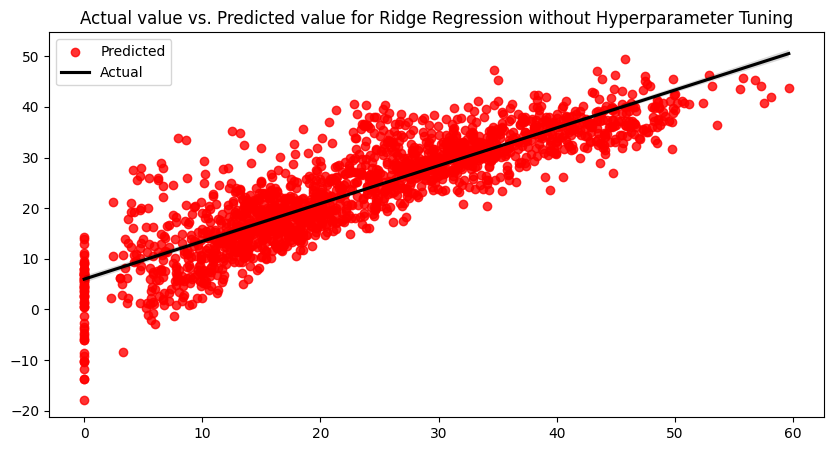

In [54]:
# ML Model - 3 Implementation
ridge=Ridge()
modelfit(ridge, X_train, X_test, y_train, y_test, 'Ridge Regression without Hyperparameter Tuning')

In [55]:
#Model hyperparameter tuning
ridge = Ridge()

# Define the hyperparameter grid for tuning
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100]}

# Create a GridSearchCV object with Ridge Regression, hyperparameters, and scoring metric
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)

# Fit the GridSearchCV to the training data
ridge_regressor.fit(X_train, y_train)

# Print the best hyperparameter value (alpha) found by GridSearchCV
print("The best fit alpha value is found out to be:", ridge_regressor.best_params_)

# Print the negative mean squared error using the best hyperparameter value
print("\nUsing", ridge_regressor.best_params_, "the negative mean squared error is:", ridge_regressor.best_score_)

The best fit alpha value is found out to be: {'alpha': 1}

Using {'alpha': 1} the negative mean squared error is: -37.746055883765486


The score for Ridge Regression with Hyperparameter Tuning is: 0.7619067687476576

**************************************************
Evaluation Metrics for Ridge Regression with Hyperparameter Tuning train dataset
**************************************************
MSE score is : 36.74475533635935
Mean Absolute Error score is : 4.600844912834158
RMSE score is : 6.061745238490261
R2 score is : 0.7619067687476576
Adjusted R^2 score is : 0.7602300558515144


**************************************************
Evaluation Metrics for Ridge Regression with Hyperparameter Tuning test dataset
**************************************************
MSE score is : 38.12955545546136
Mean Absolute Error is : 4.681020636603885
RMSE score : 6.174913396596049
R2 score is : 0.7582214568398196
Adjusted R^2 score is : 0.751260734974456




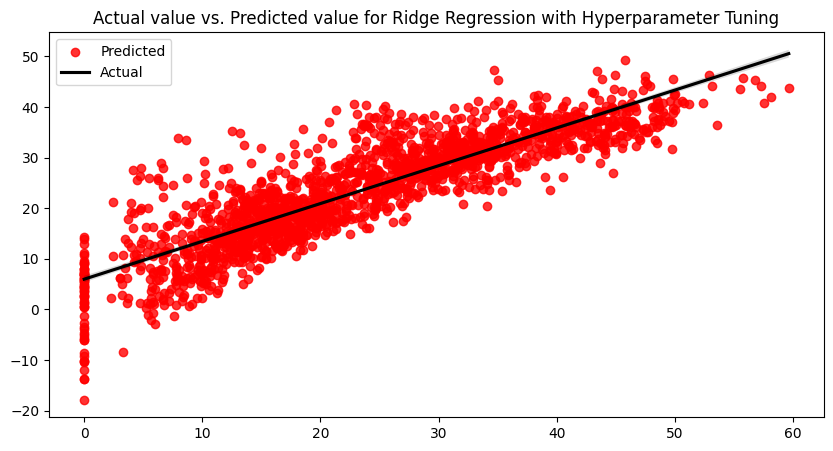

In [56]:
# Visualizing evaluation Metric Score chart
# Ridge implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
ridge= Ridge(alpha=1)
# Fit the Algorithm
modelfit(ridge, X_train, X_test, y_train, y_test, 'Ridge Regression with Hyperparameter Tuning')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

- Ridge Regression is a type of regularization technique used in machine learning, particularly in linear regression.
- It helps prevent overfitting by adding a penalty term to the loss function during model training.
- The penalty term is proportional to the square of the magnitude of the model's coefficients.
- Ridge regularization encourages the model to use smaller coefficients, resulting in a simpler and more generalizable model.
- It is also known as L2 regularization because it adds the squared L2 norm of the coefficients to the loss function.
- Ridge can be tuned with a hyperparameter called the regularization strength, which controls the trade-off between fitting the data and regularizing the model.
- A higher regularization strength results in more regularization and a simpler model, while a lower regularization strength allows the model to fit the data more closely.
- Ridge is widely used in machine learning for regression tasks when dealing with multicollinearity or high-dimensional data.

#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

- We have used GridSearch CV as
the hyperparameter optimization technique. It finds the optimal aplha value for which the model is able to perform better.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

- No

### ML Model 4
- ## ElasticNet

The score for ElasticNet is: 0.7618187138502934

**************************************************
Evaluation Metrics for ElasticNet train dataset
**************************************************
MSE score is : 36.758344784672495
Mean Absolute Error score is : 4.604446446152354
RMSE score is : 6.0628660536640995
R2 score is : 0.7618187138502934
Adjusted R^2 score is : 0.7601413808492392


**************************************************
Evaluation Metrics for ElasticNet test dataset
**************************************************
MSE score is : 38.220298947858076
Mean Absolute Error is : 4.689329409624929
RMSE score : 6.182256784367508
R2 score is : 0.7576460546582081
Adjusted R^2 score is : 0.7506687671601189




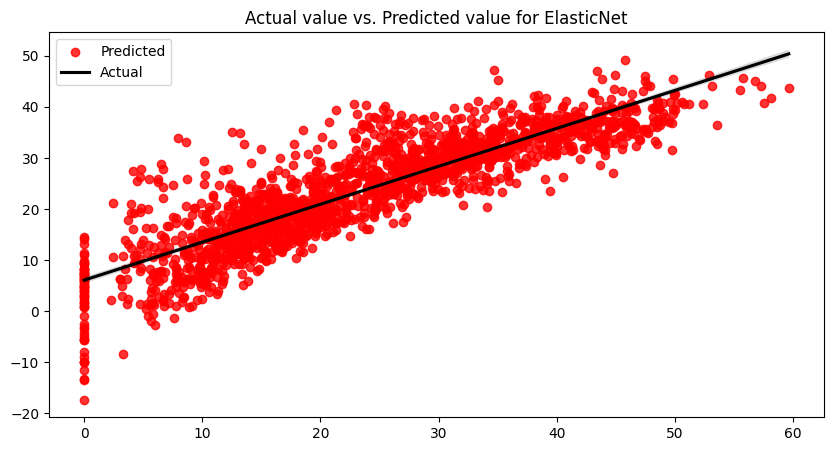

In [57]:
#Model implementation
elasticnet = ElasticNet(alpha=0.001, l1_ratio=0.5)

modelfit(elasticnet, X_train, X_test, y_train, y_test, 'ElasticNet')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


- ElasticNet is a statistical method used for linear regression that combines the L1 (Lasso) and L2 (Ridge) regularization techniques.
- It aims to overcome the limitations of both methods by adding a mixture of both penalties to the linear regression model.
- ElasticNet introduces two hyperparameters, alpha and l1_ratio, which control the strength of regularization and the balance between L1 and L2 regularization, respectively.
- This allows ElasticNet to:

> - Handle multicollinearity in the data

> - Select relevant features

> - Achieve better prediction performance compared to Lasso or Ridge alone







#### 2.Cross- Validation & Hyperparameter Tuning


##### Which hyperparameter optimization technique have you used and why?


- No Hyperparameter tuning for Elastic Net

### ML Model 5
- ## Random Forest

The score for Random Forest is: 0.984925111521687

**************************************************
Evaluation Metrics for Random Forest train dataset
**************************************************
MSE score is : 2.326496582640932
Mean Absolute Error score is : 1.0075561956821164
RMSE score is : 1.5252857380310523
R2 score is : 0.984925111521687
Adjusted R^2 score is : 0.98481895033522


**************************************************
Evaluation Metrics for Random Forest test dataset
**************************************************
MSE score is : 17.316148114188785
Mean Absolute Error is : 2.761462094893466
RMSE score : 4.161267609057219
R2 score is : 0.8901987444074749
Adjusted R^2 score is : 0.8870376036765503




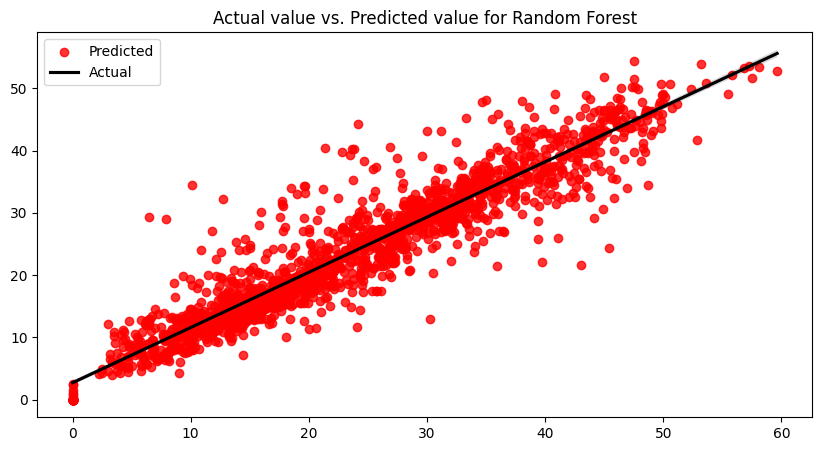

In [58]:
#Random Forest implementation
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor()
modelfit(rf_model, X_train, X_test, y_train, y_test, 'Random Forest')

In [59]:
# Create a Random Forest Regressor instance
rf = RandomForestRegressor(random_state=24)

# Define the hyperparameter grid to search
parameters = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
}

# Create a GridSearchCV instance with the Random Forest Regressor and the hyperparameter grid
rf_regressor = GridSearchCV(rf, parameters, scoring='neg_mean_squared_error', cv=3)

# Fit the GridSearchCV to the training data to find the best hyperparameters
rf_regressor.fit(X_train, y_train)

# Print the best hyperparameters found by the GridSearchCV
print("The best fit hyperparameters are:")
print(rf_regressor.best_params_)

# Print the negative mean squared error corresponding to the best hyperparameters
print("\nUsing the best hyperparameters, the negative mean squared error is:")
print(rf_regressor.best_score_)


The best fit hyperparameters are:
{'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 200}

Using the best hyperparameters, the negative mean squared error is:
-16.919313238913578


The score for Random Forest with Hyperparameter Tuning is: 0.9773775397117157

**************************************************
Evaluation Metrics for Random Forest with Hyperparameter Tuning train dataset
**************************************************
MSE score is : 3.491307854604677
Mean Absolute Error score is : 1.2362618155195646
RMSE score is : 1.8685041756990208
R2 score is : 0.9773775397117157
Adjusted R^2 score is : 0.977218226611094


**************************************************
Evaluation Metrics for Random Forest with Hyperparameter Tuning test dataset
**************************************************
MSE score is : 17.019927197155894
Mean Absolute Error is : 2.744192654723392
RMSE score : 4.125521445484909
R2 score is : 0.8920770737223143
Adjusted R^2 score is : 0.8889700094522751




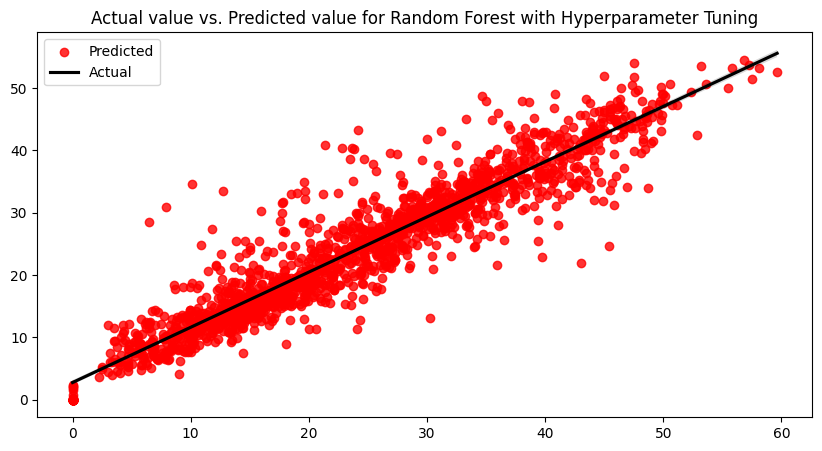

In [60]:
# Random forest implementation with hyperparameter optimization techniques (i.e., GridSearch CV)
rf = RandomForestRegressor(max_depth=30, min_samples_split=5, n_estimators=200)
# Fit the Algorithm
modelfit(rf, X_train, X_test, y_train, y_test, 'Random Forest with Hyperparameter Tuning')


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

- Random Forest is a machine learning algorithm used for both classification and regression tasks.
- It is an ensemble method that combines multiple decision trees to make more accurate predictions.
- The algorithm creates a "forest" of decision trees by randomly selecting a subset of features and data samples from the training dataset.
- Each tree in the forest is trained independently on these subsets.
The predictions of the individual trees are combined to obtain the final output.

#### 2. Cross- Validation & Hyperparameter Tuning

Which hyperparameter optimization technique have you used and why?

- Grid Search CV method

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

- Yes, Random Forest has the highest score so far.

### ML Model 6
- ### Gradient Boosting

The score for Gradient Boosting is: 0.8660588640757201

**************************************************
Evaluation Metrics for Gradient Boosting train dataset
**************************************************
MSE score is : 20.671038160658735
Mean Absolute Error score is : 3.4222252578878996
RMSE score is : 4.546541340476158
R2 score is : 0.8660588640757201
Adjusted R^2 score is : 0.8651156166396337


**************************************************
Evaluation Metrics for Gradient Boosting test dataset
**************************************************
MSE score is : 24.1041662251971
Mean Absolute Error is : 3.649177118299491
RMSE score : 4.909599395591976
R2 score is : 0.8471560938908286
Adjusted R^2 score is : 0.8427557699194129




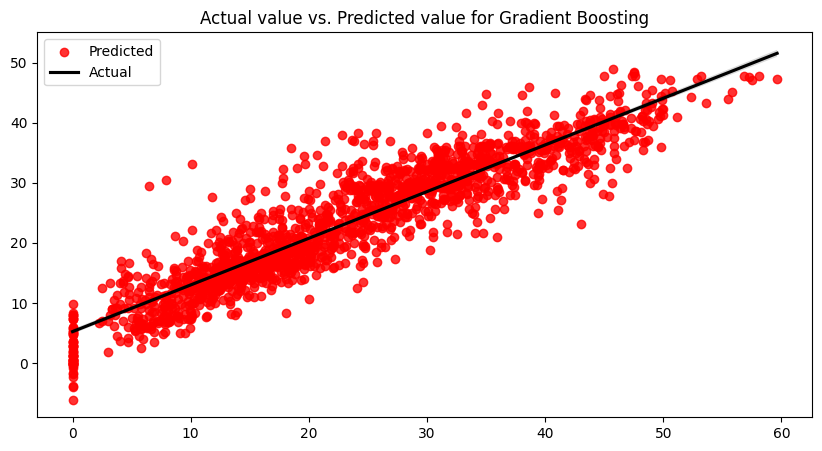

In [61]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
modelfit(gbr, X_train, X_test, y_train, y_test, 'Gradient Boosting')

In [62]:
# Create the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=24)

# Define the hyperparameter grid to search through
parameters = {
    'n_estimators': [50, 100, 150],  # Number of boosting stages to be run
    'max_depth': [10, 20, 30],  # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
}

# Create the GridSearchCV object with the specified regressor, parameters, and scoring method
gb_regressor_cv = GridSearchCV(gb_regressor, parameters, scoring='neg_mean_squared_error', cv=3)

# Fit the GridSearchCV object on the training data
gb_regressor_cv.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print("The best hyperparameters are:", gb_regressor_cv.best_params_)

# Print the best negative mean squared error found by GridSearchCV
print("The negative mean squared error with the best hyperparameters is:", gb_regressor_cv.best_score_)


The best hyperparameters are: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 150}
The negative mean squared error with the best hyperparameters is: -16.54318427331145


The score for Gradient Boosting with Hyperparameter Tuning is: 0.9944136786531268

**************************************************
Evaluation Metrics for Gradient Boosting with Hyperparameter Tuning train dataset
**************************************************
MSE score is : 0.8621329134030903
Mean Absolute Error score is : 0.6395835031366354
RMSE score is : 0.9285111272370893
R2 score is : 0.9944136786531268
Adjusted R^2 score is : 0.9943743383619517


**************************************************
Evaluation Metrics for Gradient Boosting with Hyperparameter Tuning test dataset
**************************************************
MSE score is : 15.67175820855188
Mean Absolute Error is : 2.63900204351705
RMSE score : 3.9587571545311895
R2 score is : 0.9006257790535149
Adjusted R^2 score is : 0.8977648290967712




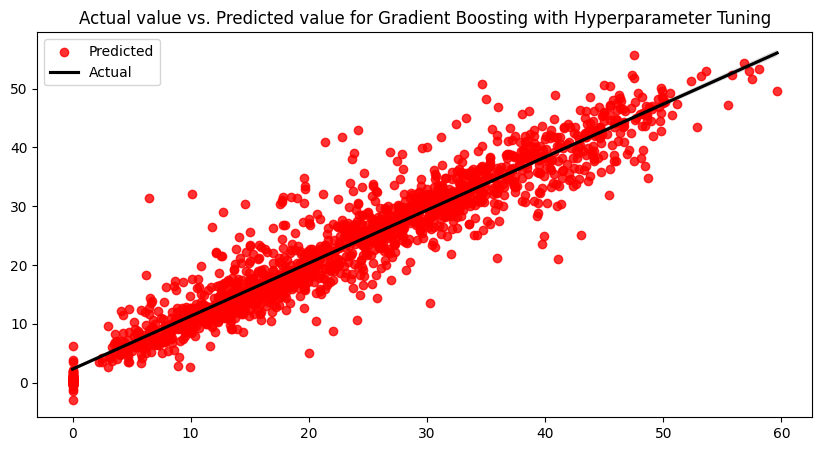

In [63]:
# Gradient Boosting implementation with hyperparameter optimization techniques (i.e., GridSearch CV)
gbr = GradientBoostingRegressor(max_depth=10, min_samples_split=5, n_estimators=150)
# Fit the Algorithm
modelfit(gbr, X_train, X_test, y_train, y_test, 'Gradient Boosting with Hyperparameter Tuning')


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In [64]:
# converting the test and train stastics into a dataframe
Test=pd.DataFrame(test,index=["Test MSE", 'Test MAE', "Test RMSE",'Test R^2','Test Adjusted R^2'])
Train=pd.DataFrame(train,index=["Train MSE", 'Train MAE', "Train RMSE",'Train R^2','Train Adjusted R^2'])

In [65]:
output_df = pd.concat([Train, Test], axis=0).T
output_df

Train MSE  Train MAE  \
Linear Regression                               36.743749   4.599728   
Lasso without Hyperparameter Tuning             91.299090   7.233669   
Lasso Regression with Hyperparameter Tuning     36.743761   4.599695   
Ridge Regression without Hyperparameter Tuning  36.744755   4.600845   
Ridge Regression with Hyperparameter Tuning     36.744755   4.600845   
ElasticNet                                      36.758345   4.604446   
Random Forest                                    2.326497   1.007556   
Random Forest with Hyperparameter Tuning         3.491308   1.236262   
Gradient Boosting                               20.671038   3.422225   
Gradient Boosting with Hyperparameter Tuning     0.862133   0.639584   

                                                Train RMSE  Train R^2  \
Linear Regression                                 6.061662   0.761913   
Lasso without Hyperparameter Tuning               9.555056   0.408414   
Lasso Regression with Hyperparameter Tuning       6.061663   0.761913   
Ridge Regression without Hyperparameter Tuning    6.061745   0.761907   
Ridge Regression with Hyperparameter Tuning       6.061745   0.761907   
ElasticNet                                        6.062866   0.761819   
Random Forest                                     1.525286   0.984925   
Random Forest with Hyperparameter Tuning          1.868504   0.977378   
Gradient Boosting                                 4.546541   0.866059   
Gradient Boosting with Hyperparameter Tuning      0.928511   0.994414   

                                                Train Adjusted R^2   Test MSE  \
Linear Regression                                         0.760237  38.102381   
Lasso without Hyperparameter Tuning                       0.404248  98.870110   
Lasso Regression with Hyperparameter Tuning               0.760237  38.105770   
Ridge Regression without Hyperparameter Tuning            0.760230  38.129555   
Ridge Regression with Hyperparameter Tuning               0.760230  38.129555   
ElasticNet                                                0.760141  38.220299   
Random Forest                                             0.984819  17.316148   
Random Forest with Hyperparameter Tuning                  0.977218  17.019927   
Gradient Boosting                                         0.865116  24.104166   
Gradient Boosting with Hyperparameter Tuning              0.994374  15.671758   

                                                Test MAE  Test RMSE  Test R^2  \
Linear Regression                               4.678101   6.172713  0.758394   
Lasso without Hyperparameter Tuning             7.522749   9.943345  0.373067   
Lasso Regression with Hyperparameter Tuning     4.678270   6.172987  0.758372   
Ridge Regression without Hyperparameter Tuning  4.681021   6.174913  0.758221   
Ridge Regression with Hyperparameter Tuning     4.681021   6.174913  0.758221   
ElasticNet                                      4.689329   6.182257  0.757646   
Random Forest                                   2.761462   4.161268  0.890199   
Random Forest with Hyperparameter Tuning        2.744193   4.125521  0.892077   
Gradient Boosting                               3.649177   4.909599  0.847156   
Gradient Boosting with Hyperparameter Tuning    2.639002   3.958757  0.900626   

                                                Test Adjusted R^2  
Linear Regression                                        0.751438  
Lasso without Hyperparameter Tuning                      0.355018  
Lasso Regression with Hyperparameter Tuning              0.751416  
Ridge Regression without Hyperparameter Tuning           0.751261  
Ridge Regression with Hyperparameter Tuning              0.751261  
ElasticNet                                               0.750669  
Random Forest                                            0.887038  
Random Forest with Hyperparameter Tuning                 0.888970  
Gradient Boosting                                      

In [66]:
# Viewing the data for train set
Train.transpose()

Train MSE  Train MAE  \
Linear Regression                               36.743749   4.599728   
Lasso without Hyperparameter Tuning             91.299090   7.233669   
Lasso Regression with Hyperparameter Tuning     36.743761   4.599695   
Ridge Regression without Hyperparameter Tuning  36.744755   4.600845   
Ridge Regression with Hyperparameter Tuning     36.744755   4.600845   
ElasticNet                                      36.758345   4.604446   
Random Forest                                    2.326497   1.007556   
Random Forest with Hyperparameter Tuning         3.491308   1.236262   
Gradient Boosting                               20.671038   3.422225   
Gradient Boosting with Hyperparameter Tuning     0.862133   0.639584   

                                                Train RMSE  Train R^2  \
Linear Regression                                 6.061662   0.761913   
Lasso without Hyperparameter Tuning               9.555056   0.408414   
Lasso Regression with Hyperparameter Tuning       6.061663   0.761913   
Ridge Regression without Hyperparameter Tuning    6.061745   0.761907   
Ridge Regression with Hyperparameter Tuning       6.061745   0.761907   
ElasticNet                                        6.062866   0.761819   
Random Forest                                     1.525286   0.984925   
Random Forest with Hyperparameter Tuning          1.868504   0.977378   
Gradient Boosting                                 4.546541   0.866059   
Gradient Boosting with Hyperparameter Tuning      0.928511   0.994414   

                                                Train Adjusted R^2  
Linear Regression                                         0.760237  
Lasso without Hyperparameter Tuning                       0.404248  
Lasso Regression with Hyperparameter Tuning               0.760237  
Ridge Regression without Hyperparameter Tuning            0.760230  
Ridge Regression with Hyperparameter Tuning               0.760230  
ElasticNet                                                0.760141  
Random Forest                                             0.984819  
Random Forest with Hyperparameter Tuning                  0.977218  
Gradient Boosting                                         0.865116  
Gradient Boosting with Hyperparameter Tuning              0.994374

In [67]:
# Viewing the data for test set
Test.transpose()

Test MSE  Test MAE  \
Linear Regression                               38.102381  4.678101   
Lasso without Hyperparameter Tuning             98.870110  7.522749   
Lasso Regression with Hyperparameter Tuning     38.105770  4.678270   
Ridge Regression without Hyperparameter Tuning  38.129555  4.681021   
Ridge Regression with Hyperparameter Tuning     38.129555  4.681021   
ElasticNet                                      38.220299  4.689329   
Random Forest                                   17.316148  2.761462   
Random Forest with Hyperparameter Tuning        17.019927  2.744193   
Gradient Boosting                               24.104166  3.649177   
Gradient Boosting with Hyperparameter Tuning    15.671758  2.639002   

                                                Test RMSE  Test R^2  \
Linear Regression                                6.172713  0.758394   
Lasso without Hyperparameter Tuning              9.943345  0.373067   
Lasso Regression with Hyperparameter Tuning      6.172987  0.758372   
Ridge Regression without Hyperparameter Tuning   6.174913  0.758221   
Ridge Regression with Hyperparameter Tuning      6.174913  0.758221   
ElasticNet                                       6.182257  0.757646   
Random Forest                                    4.161268  0.890199   
Random Forest with Hyperparameter Tuning         4.125521  0.892077   
Gradient Boosting                                4.909599  0.847156   
Gradient Boosting with Hyperparameter Tuning     3.958757  0.900626   

                                                Test Adjusted R^2  
Linear Regression                                        0.751438  
Lasso without Hyperparameter Tuning                      0.355018  
Lasso Regression with Hyperparameter Tuning              0.751416  
Ridge Regression without Hyperparameter Tuning           0.751261  
Ridge Regression with Hyperparameter Tuning              0.751261  
ElasticNet                                               0.750669  
Random Forest                                            0.887038  
Random Forest with Hyperparameter Tuning                 0.888970  
Gradient Boosting                                        0.842756  
Gradient Boosting with Hyperparameter Tuning             0.897765

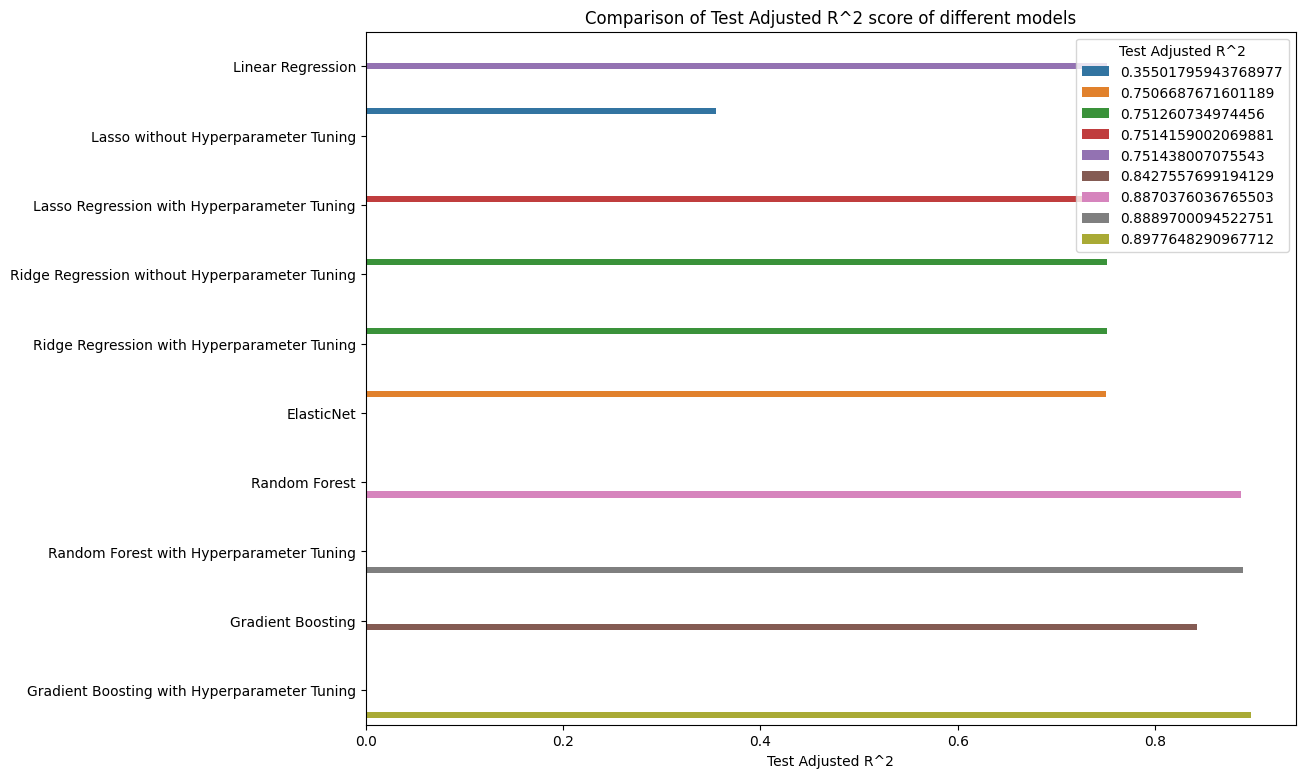

In [68]:
plt.figure(figsize=(12,9))
sns.barplot(data=output_df,x=output_df['Test Adjusted R^2'], y=output_df.index, order=output_df.index, hue=output_df['Test Adjusted R^2'])
plt.title("Comparison of Test Adjusted R^2 score of different models")
plt.show()

### ML Model Conclusion:
- ### **Considering the adjusted r^2 score on the test stastics, Gradient Boosting regression has the best score of 89.77%**

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

- Gradient Boosting regression(with hyperparameter tuning) as it has the highest score among all the models

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [69]:
# Extract the names of the features (columns) from the DataFrame 'x'
features = x.columns

# Get the feature importances from the trained Random Forest model
importance = rf_model.feature_importances_

# Get the indices that would sort the 'importance' array in ascending order
indices = np.argsort(importance)

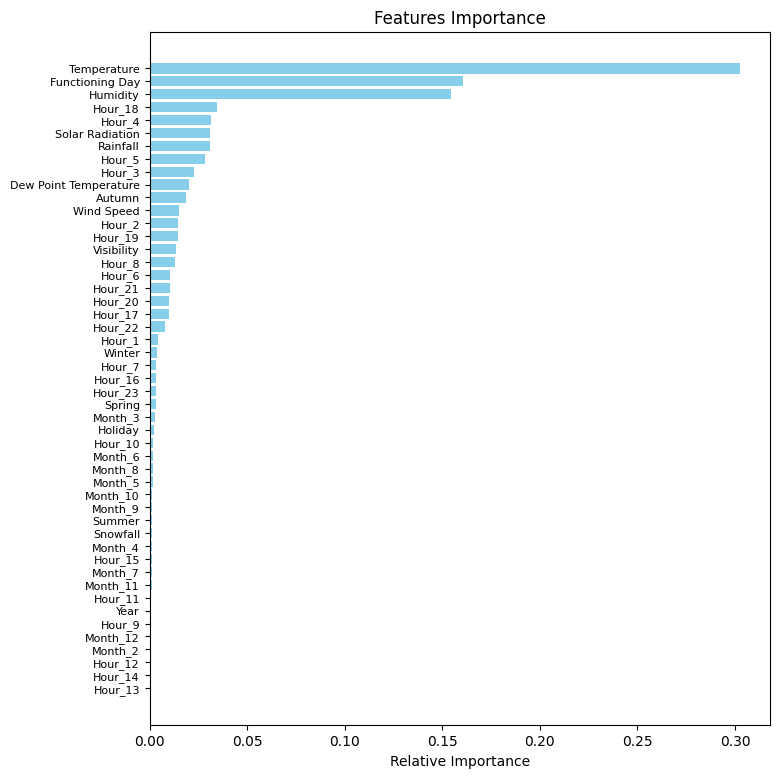

In [70]:
# Plotting figure

plt.figure(figsize=(8,9))
plt.title('Features Importance')
plt.barh(range(len(indices)), importance[indices], color='skyblue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize = 8)
plt.xlabel('Relative Importance')
plt.show()

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [71]:
# Save the File
import pickle
dir_path = '/content/drive/MyDrive/Bike_Sharing_Demand_Prediction_Project'
pickle_path = dir_path + 'GradientBoostRegressor.pkl'

# serialize process (wb=write byte)
pickle.dump(gbr, open(pickle_path,'wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [72]:
# Loading the saved model from the pickle file
Regression_model = pickle.load(open(pickle_path,'rb'))

# Predicting on the unseen data(test set)
Regression_model.predict(X_test)

array([28.20978251,  1.18442142, 52.16865497, ...,  6.83572534,
       30.77444924,  6.21984927])

# **Conclusion**

- Most of the data (95.07%) is from working days, while 4.93% is from holidays.
- Most of the data (96.63%) is from functioning days, while the remaining 3.37% is from non-functioning days.
- The data is evenly distributed across the four seasons.
- Most of the data (91.5%) is from 2018, while the remaining 8.5% is from 2017.
- The data was collected between January 12, 2017 and December 11, 2018.
- More bikes were rented in 2018 (5986984) than in 2017 (185330).
- No bikes were rented on non-functioning days, which indicates that the business was not operating on those days.
- Bike rentals started to increase in December 2017.
- Bike rentals peaked at 8am and 6pm, which suggests that people are renting bikes to commute to and from work.
- No bikes were rented on non-functioning days.
- Bike demand is higher in the summer and lower in the winter.
- People prefer to rent bikes when the wind speed is moderate.
- Bike rentals increased after the 50th week.
- Bike rentals peaked in the 25th week of the second year.


Weather factor relationship with demand for rental bikes:

- Temperature : Positive (increases demand)
-Humidity : Negative (decreases demand)
- Wind speed : Positive (increases demand) up to 3 kilometers per hour
- Visibility : No clear relationship
- Dew point temperature : Positive (increases demand)
- Solar radiation : Positive (increases demand)
- Snowfall and rainfall : Negative (decreases demand)


We selected the Gradient Boosting Regressor model with hyperparameter tuning as our final model.

### ***End of Project***